# SmarTemplateSingleAttributeAnalysis

In [35]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [45]:
pre = pd.read_csv('TrainingSetNoMissingValue.csv')
post = pd.read_csv('TrainingSetcorretto.csv')
pre["PurchDate"] = pre["PurchDate"].astype("datetime64")
post["PurchDate"] = post["PurchDate"].astype("datetime64")

#Set dei titoli relativi ai plot delle variabili
titlePre='Old Distribution'
titlePost='New Distribution'

#variabile che definisce la presenza di un confroto
comp=True

#numero di bins  per gli istogrammi
PreBins=math.ceil(math.log(pre.shape[0],2))+1
PostBins=math.ceil(math.log(post.shape[0],2))+1

#listaVariabiliCategoriche
categories=['IsBadBuy', 'Auction', 'Make', 'Engine', 'Trim', 'SubModelSpecifics', 'Color', 'Transmission', 
            'WheelTypeID', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART',
            'BYRNO', 'VNZIP1', 'VNST', 'IsOnlineSale', 'Model', 'Wheeldrives', 'Doors', 'SubModel']

#listaVariabiliNumeriche (per statistiche)
num_catProp=['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 
         'MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice',
         'MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice',
         'MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice','VehBCost','WarrantyCost','VehOdo']

##listaVariabiliNumeriche (per statistiche con limite superiore e inferiore)
num_catDis=[['VehOdo', 20000,0], ['MMRAcquisitionAuctionAveragePrice',20000,0], ['MMRAcquisitionAuctionCleanPrice',20000,0], 
         ['MMRAcquisitionRetailAveragePrice',20000,0],['MMRAcquisitonRetailCleanPrice',20000,0],
         ['MMRCurrentAuctionAveragePrice',20000,0],['MMRCurrentAuctionCleanPrice',20000,0],
         ['MMRCurrentRetailAveragePrice',20000,0],['MMRCurrentRetailCleanPrice',20000,0],['VehBCost',20000,0],['WarrantyCost',20000,0]]

# Check initial status 

In [37]:
pre.isnull().sum() 

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Engine                               19402
Trim                                     0
SubModelSpecifics                    48333
Color                                    7
Transmission                             0
WheelTypeID                              0
WheelType                             2550
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice          0
MMRAcquisitionRetailAveragePrice         0
MMRAcquisitonRetailCleanPrice            0
MMRCurrentAuctionAveragePrice            0
MMRCurrentA

In [6]:
post.isnull().sum() 

PurchDate                                0
Model                                    0
SubModel                                 0
VehYear                                  0
RefId                                    0
IsBadBuy                                 0
Auction                                  0
VehicleAge                               0
Make                                     0
Engine                               17828
Trim                                     0
SubModelSpecifics                    43175
Color                                    7
Transmission                             0
WheelTypeID                              0
WheelType                             2306
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice          0
MMRAcquisitionRetailAveragePrice         0
MMRAcquisit

In [7]:
(pre == 0).sum(axis=0)

RefId                                    0
IsBadBuy                             50402
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               1
Make                                     0
Engine                                   0
Trim                                     0
SubModelSpecifics                        0
Color                                    0
Transmission                             0
WheelTypeID                              0
WheelType                                0
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice          0
MMRAcquisitionRetailAveragePrice         0
MMRAcquisitonRetailCleanPrice            0
MMRCurrentAuctionAveragePrice            0
MMRCurrentA

In [8]:
(post == 0).sum(axis=0)

PurchDate                                0
Model                                    0
SubModel                                 0
VehYear                                  0
RefId                                    0
IsBadBuy                             44529
Auction                                  0
VehicleAge                               1
Make                                     0
Engine                                   0
Trim                                     0
SubModelSpecifics                        0
Color                                    0
Transmission                             0
WheelTypeID                              0
WheelType                                0
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice          0
MMRAcquisitionRetailAveragePrice         0
MMRAcquisit

In [9]:
(pre == 1).sum(axis=0)

RefId                                    1
IsBadBuy                              7093
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                            2437
Make                                     0
Engine                                   0
Trim                                     0
SubModelSpecifics                        0
Color                                    0
Transmission                             0
WheelTypeID                          30852
WheelType                                0
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice          0
MMRAcquisitionRetailAveragePrice         0
MMRAcquisitonRetailCleanPrice            0
MMRCurrentAuctionAveragePrice            0
MMRCurrentA

In [10]:
(post == 1).sum(axis=0)

PurchDate                                0
Model                                    0
SubModel                                 0
VehYear                                  0
RefId                                    1
IsBadBuy                              6377
Auction                                  0
VehicleAge                            2284
Make                                     0
Engine                                   0
Trim                                     0
SubModelSpecifics                        0
Color                                    0
Transmission                             0
WheelTypeID                          26928
WheelType                                0
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice          0
MMRAcquisitionRetailAveragePrice         0
MMRAcquisit

# Analisi Variabili Particolari

# PurchDate

In [42]:
Variable='PurchDate'

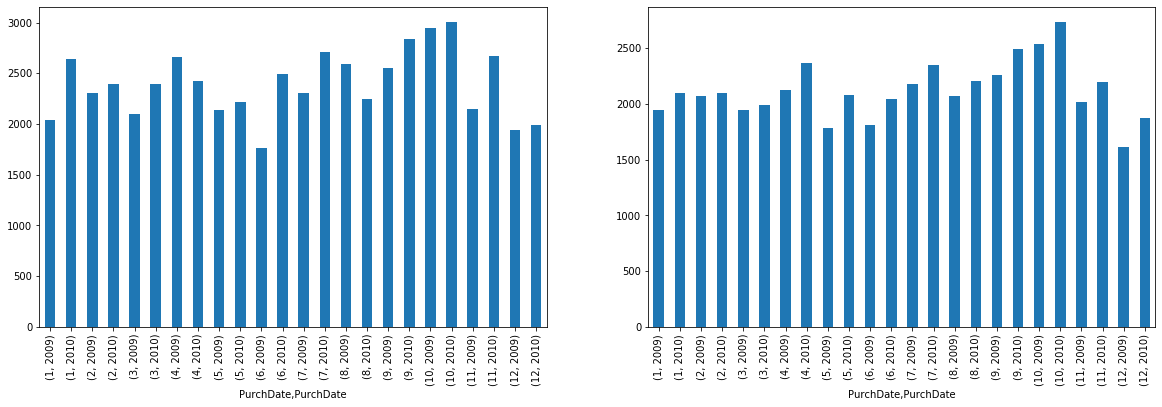

In [46]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    # Set up a grid of plots
    fig = plt.figure(figsize=(20, 20)) 
    fig_dims = (3, 2)

    # Plot old Distribution
    plt.subplot2grid(fig_dims, (0, 0))
    pre.groupby([pre[Variable].dt.month, pre[Variable].dt.year ])[Variable].count().plot(kind="bar")

    # Plot new Distribution
    if compare:
        plt.subplot2grid(fig_dims, (0, 1))
        post.groupby([post[Variable].dt.month, pre[Variable].dt.year ])[Variable].count().plot(kind="bar")

    plt.show()

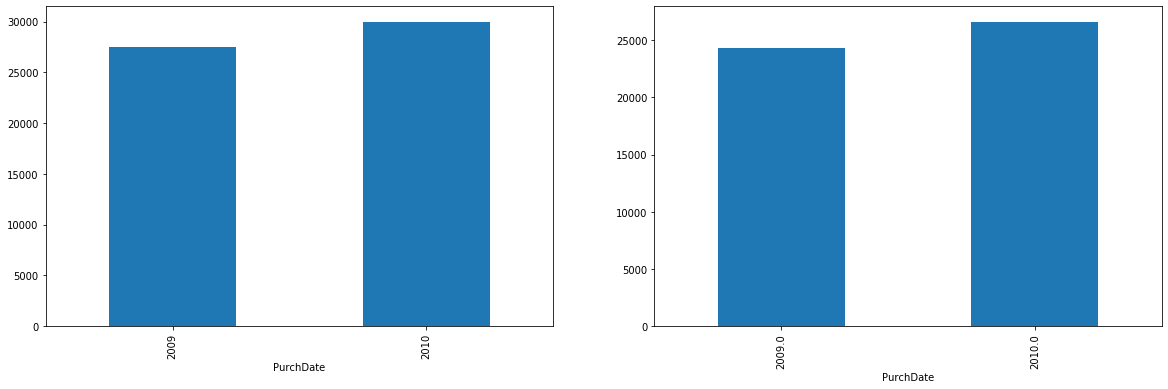

In [48]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    # Set up a grid of plots
    fig = plt.figure(figsize=(20, 20)) 
    fig_dims = (3, 2)

    # Plot old Distribution
    plt.subplot2grid(fig_dims, (0, 0))
    pre.groupby(pre[Variable].dt.year)[Variable].count().plot(kind="bar")

    # Plot new Distribution
    if compare:
        plt.subplot2grid(fig_dims, (0, 1))
        pre.groupby(post[Variable].dt.year)[Variable].count().plot(kind="bar")

    plt.show()

# VehicleYear

In [49]:
Variable='VehYear'

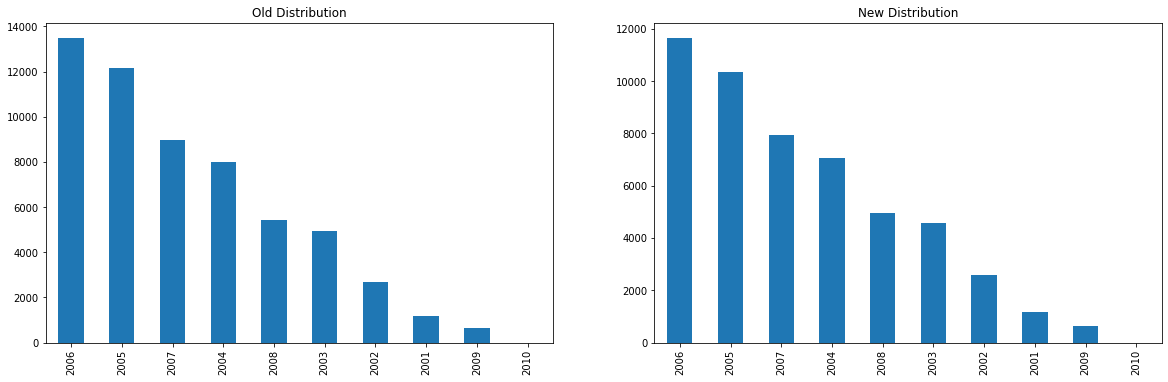

In [50]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    # Set up a grid of plots
    fig = plt.figure(figsize=(20, 20)) 
    fig_dims = (3, 2)

    # Plot old Distribution
    plt.subplot2grid(fig_dims, (0, 0))
    pre[Variable].value_counts().plot(kind="bar", title=titlePre)

    # Plot new Distribution
    if compare:
        plt.subplot2grid(fig_dims, (0, 1))
        post[Variable].value_counts().plot(kind="bar", title=titlePost)

    plt.show()

In [51]:
if Variable in pre.columns:
    print(pre[Variable].value_counts())

2006    13489
2005    12153
2007     8991
2004     7994
2008     5428
2003     4919
2002     2682
2001     1175
2009      663
2010        1
Name: VehYear, dtype: int64


In [52]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    if compare:
        print(post[Variable].value_counts())

2006    11649
2005    10362
2007     7948
2004     7065
2008     4952
2003     4555
2002     2577
2001     1165
2009      632
2010        1
Name: VehYear, dtype: int64


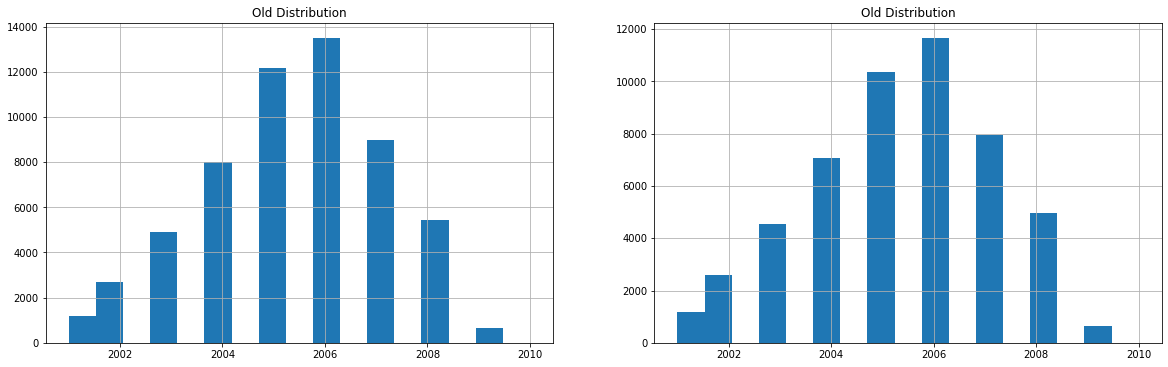

In [54]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    # Set up a grid of plots
    fig = plt.figure(figsize=(20, 20)) 
    fig_dims = (3, 2)

    # Plot old Distribution
    plt.subplot2grid(fig_dims, (0, 0),  title=titlePre)
    pre[Variable].hist(bins=PreBins)

    # Plot new Distribution
    if compare:
        plt.subplot2grid(fig_dims, (0, 1), title=titlePre)
        post[Variable].hist(bins=PostBins)

    plt.show()

In [55]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    #Codice per identificare i valori poco ripetuti
    ModelCount=pre[Variable].value_counts()
    preOut=ModelCount.loc[pre[Variable].value_counts()<2]
        
    if compare:
        ModelCount=post[Variable].value_counts()
        postOut=ModelCount.loc[post[Variable].value_counts()<2]
        print('I valori ripetuti una volta nel pre sono:')
        print(str(preOut)+'\n')
        print('I valori ripetuti una volta nel post sono:')
        print(str(postOut)+'\n')
    else:
        print('I valori ripetuti una volta nel pre sono:')
        print(str(preOut)+'\n')

I valori ripetuti una volta nel pre sono:
2010    1
Name: VehYear, dtype: int64

I valori ripetuti una volta nel post sono:
2010    1
Name: VehYear, dtype: int64



# VehicleAge

In [56]:
Variable='VehicleAge'

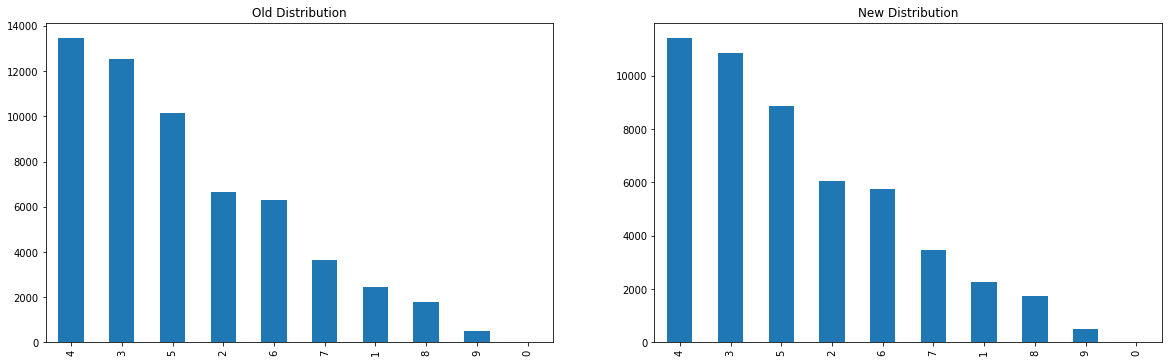

In [57]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    # Set up a grid of plots
    fig = plt.figure(figsize=(20, 20)) 
    fig_dims = (3, 2)

    # Plot old Distribution
    plt.subplot2grid(fig_dims, (0, 0))
    pre[Variable].value_counts().plot(kind="bar", title=titlePre)

    # Plot new Distribution
    if compare:
        plt.subplot2grid(fig_dims, (0, 1))
        post[Variable].value_counts().plot(kind="bar", title=titlePost)

    plt.show()

In [58]:
if Variable in pre.columns:
    print(pre[Variable].value_counts())

4    13467
3    12527
5    10164
2     6668
6     6288
7     3664
1     2437
8     1776
9      503
0        1
Name: VehicleAge, dtype: int64


In [59]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    if compare:
        print(post[Variable].value_counts())

4    11424
3    10844
5     8861
2     6069
6     5739
7     3464
1     2284
8     1725
9      495
0        1
Name: VehicleAge, dtype: int64


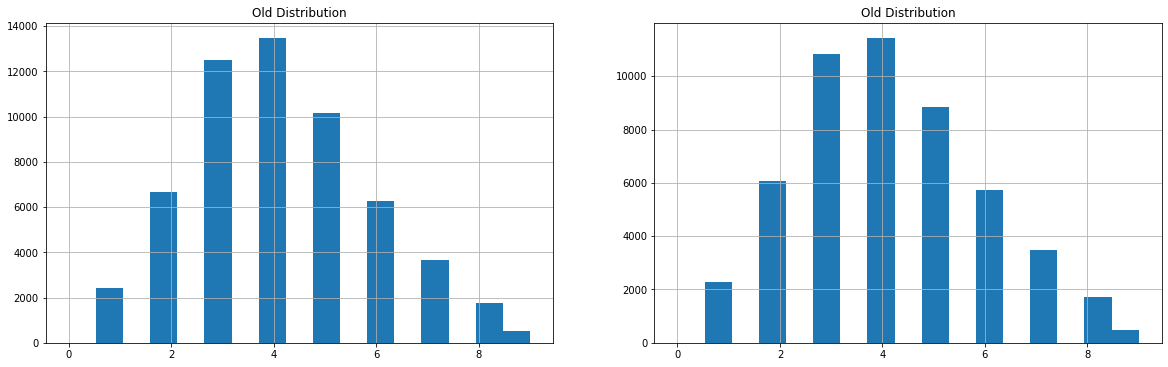

In [60]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    
    # Set up a grid of plots
    fig = plt.figure(figsize=(20, 20)) 
    fig_dims = (3, 2)

    # Plot old Distribution
    plt.subplot2grid(fig_dims, (0, 0),  title=titlePre)
    pre[Variable].hist(bins=PreBins)

    # Plot new Distribution
    if compare:
        plt.subplot2grid(fig_dims, (0, 1), title=titlePre)
        post[Variable].hist(bins=PostBins)

    plt.show()

In [61]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    #Codice per identificare i valori poco ripetuti
    ModelCount=pre[Variable].value_counts()
    preOut=ModelCount.loc[pre[Variable].value_counts()<2]
        
    if compare:
        ModelCount=post[Variable].value_counts()
        postOut=ModelCount.loc[post[Variable].value_counts()<2]
        print('I valori ripetuti una volta nel pre sono:')
        print(str(preOut)+'\n')
        print('I valori ripetuti una volta nel post sono:')
        print(str(postOut)+'\n')
    else:
        print('I valori ripetuti una volta nel pre sono:')
        print(str(preOut)+'\n')

I valori ripetuti una volta nel pre sono:
0    1
Name: VehicleAge, dtype: int64

I valori ripetuti una volta nel post sono:
0    1
Name: VehicleAge, dtype: int64



# Analisi Comulativa variabili simili

IsBadBuy


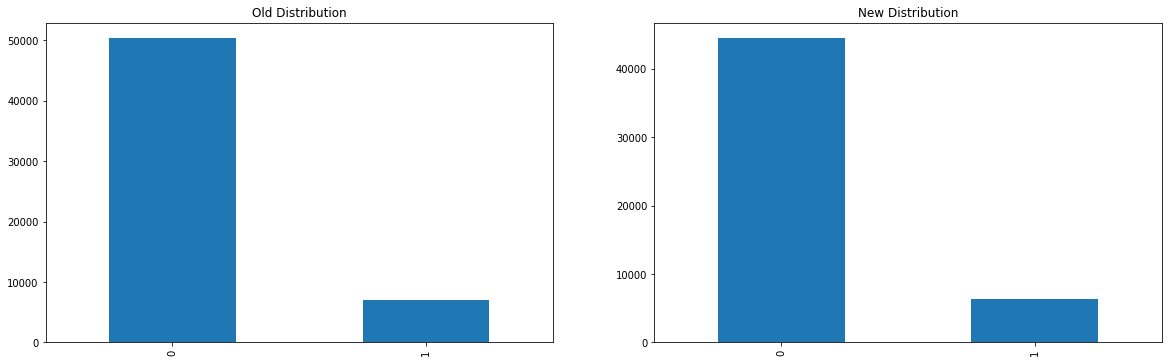

Numero valori unici pre: 2
Numero valori unici post: 2

Conta occorrenze valori unici pre
0    50402
1     7093
Name: IsBadBuy, dtype: int64

Conta occorrenze valori unici post
0    44529
1     6377
Name: IsBadBuy, dtype: int64

I valori ripetuti una volta nel pre sono:
Series([], Name: IsBadBuy, dtype: int64)

I valori ripetuti una volta nel post sono:
Series([], Name: IsBadBuy, dtype: int64)






Auction


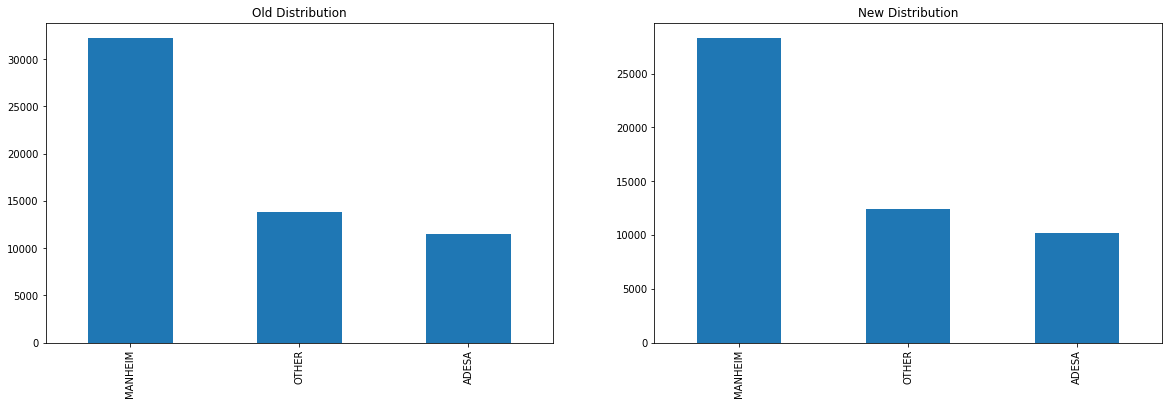

Numero valori unici pre: 3
Numero valori unici post: 3

Conta occorrenze valori unici pre
MANHEIM    32241
OTHER      13796
ADESA      11458
Name: Auction, dtype: int64

Conta occorrenze valori unici post
MANHEIM    28309
OTHER      12420
ADESA      10177
Name: Auction, dtype: int64

I valori ripetuti una volta nel pre sono:
Series([], Name: Auction, dtype: int64)

I valori ripetuti una volta nel post sono:
Series([], Name: Auction, dtype: int64)






Make


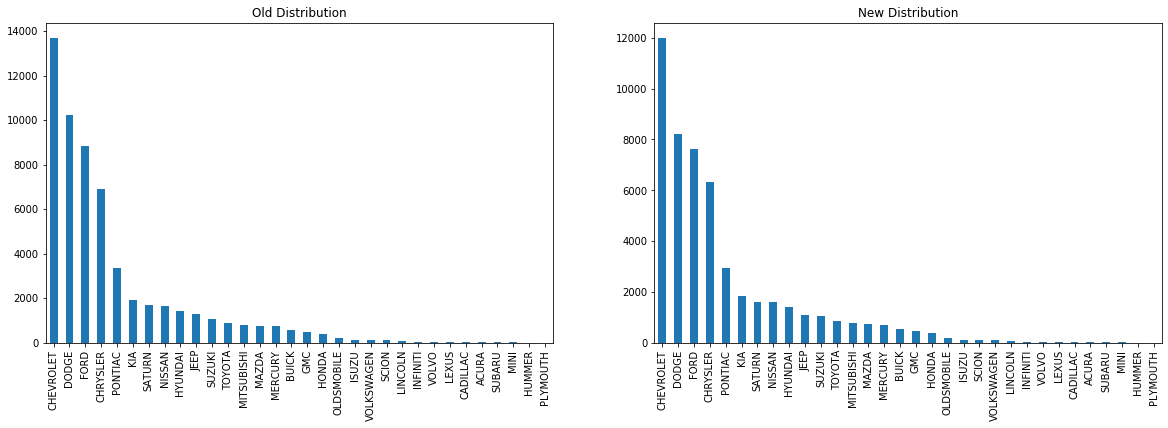

Numero valori unici pre: 32
Numero valori unici post: 32

Conta occorrenze valori unici pre
CHEVROLET     13679
DODGE         10248
FORD           8838
CHRYSLER       6924
PONTIAC        3362
KIA            1933
SATURN         1685
NISSAN         1668
HYUNDAI        1436
JEEP           1270
SUZUKI         1053
TOYOTA          891
MITSUBISHI      810
MAZDA           765
MERCURY         732
BUICK           557
GMC             477
HONDA           401
OLDSMOBILE      190
ISUZU           107
VOLKSWAGEN      104
SCION           103
LINCOLN          79
INFINITI         36
VOLVO            30
LEXUS            27
CADILLAC         25
ACURA            25
SUBARU           21
MINI             17
HUMMER            1
PLYMOUTH          1
Name: Make, dtype: int64

Conta occorrenze valori unici post
CHEVROLET     11988
DODGE          8205
FORD           7635
CHRYSLER       6343
PONTIAC        2957
KIA            1851
SATURN         1600
NISSAN         1591
HYUNDAI        1394
JEEP           1081
SUZUKI 

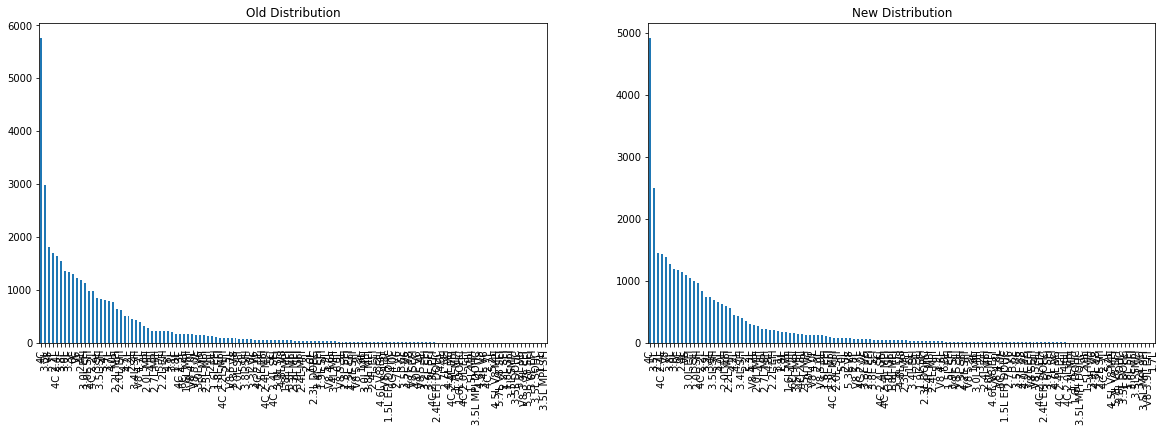

Numero valori unici pre: 128
Numero valori unici post: 127

Conta occorrenze valori unici pre
4C              5757
3.5L            2981
V8              1806
2.7L            1690
4C 2.4L         1640
                ... 
5.3L V8 SFI        1
3.6L EFI           1
3.5L SOHC          1
1.7L               1
3.5L MPI SFI       1
Name: Engine, Length: 128, dtype: int64

Conta occorrenze valori unici post
4C              4917
3.5L            2495
2.7L            1453
4C 2.4L         1437
V8              1383
                ... 
3.5L SMPI          1
3.2L V6            1
3.5L MPI SFI       1
V8 3.9L EFI        1
1.7L               1
Name: Engine, Length: 127, dtype: int64

I valori ripetuti una volta nel pre sono:
3.5L SMPI       1
3.5L DOHC       1
3.2L V6         1
V8 3.9L EFI     1
5.3L V8 SFI     1
3.6L EFI        1
3.5L SOHC       1
1.7L            1
3.5L MPI SFI    1
Name: Engine, dtype: int64

I valori ripetuti una volta nel post sono:
3.5L SOHC       1
3.5L DOHC       1
1.8L SFI        

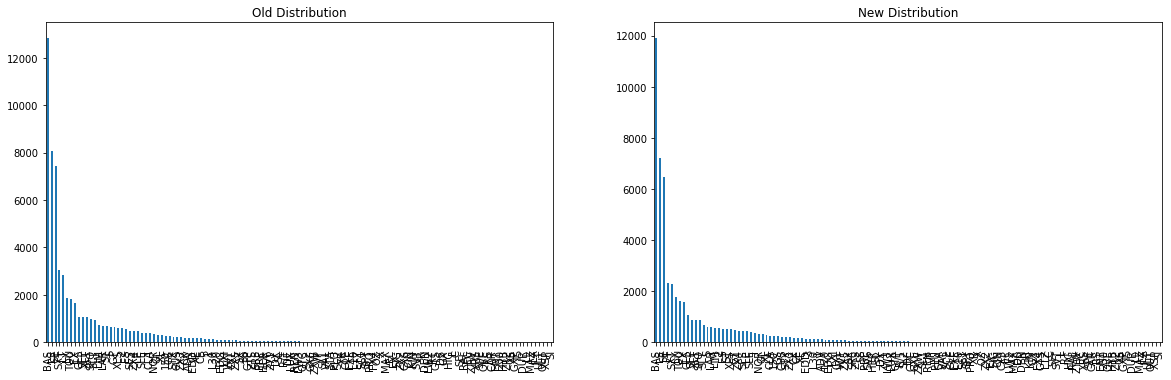

Numero valori unici pre: 129
Numero valori unici post: 129

Conta occorrenze valori unici pre
BAS    12852
LS      8067
SE      7454
SXT     3038
LT      2835
       ...  
JLX        1
ULT        1
OUT        1
XSP        1
SI         1
Name: Trim, Length: 129, dtype: int64

Conta occorrenze valori unici post
BAS    11924
LS      7209
SE      6480
LT      2314
SXT     2285
       ...  
JLX        1
ULT        1
OUT        1
XSP        1
SI         1
Name: Trim, Length: 129, dtype: int64

I valori ripetuti una volta nel pre sono:
LL     1
MAZ    1
JLX    1
ULT    1
OUT    1
XSP    1
SI     1
Name: Trim, dtype: int64

I valori ripetuti una volta nel post sono:
LL     1
MAZ    1
JLX    1
ULT    1
OUT    1
XSP    1
SI     1
Name: Trim, dtype: int64






SubModelSpecifics


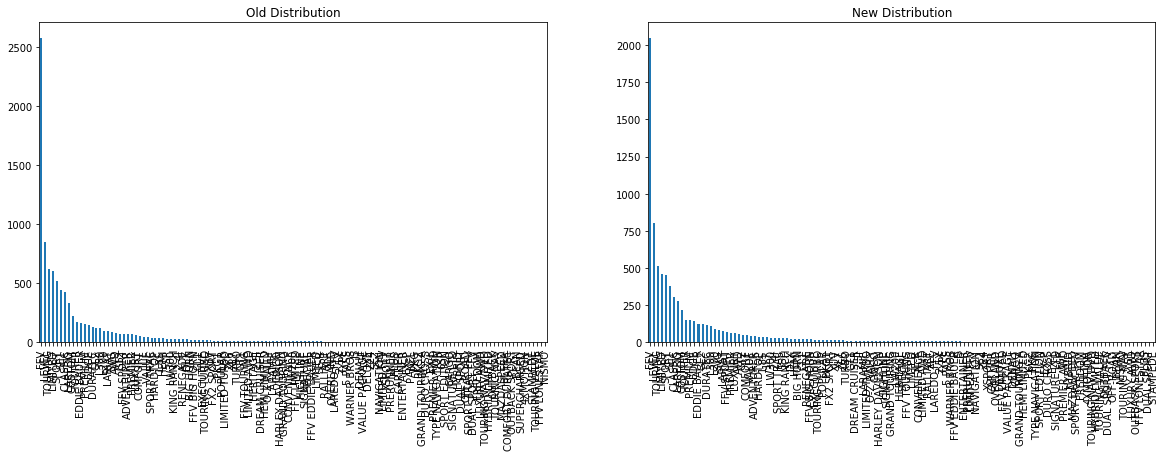

Numero valori unici pre: 129
Numero valori unici post: 126

Conta occorrenze valori unici pre
FFV              2579
LEVEL             846
TOURING           622
LIMITED           605
SPORT             518
                 ... 
2.5T                1
STAMPEDE            1
TOURING VALUE       1
FFV LONESTAR        1
NISMO               1
Name: SubModelSpecifics, Length: 129, dtype: int64

Conta occorrenze valori unici post
FFV              2052
LEVEL             804
TOURING           514
LIMITED           460
SPORT             451
                 ... 
OUTBACK SPORT       1
FFV LONESTAR        1
PLUS                1
DUAL SPORT          1
STAMPEDE            1
Name: SubModelSpecifics, Length: 126, dtype: int64

I valori ripetuti una volta nel pre sono:
DUAL SPORT         1
OFF-ROAD           1
SPORT TRAC FFV     1
DUAL SPORT FFV     1
FREEDOM            1
LUXURY AWD         1
TOURING NAV DVD    1
HYBRID LIMITED     1
OUTBACK            1
TOURING NAV        1
MAZDASPEED         1
ULTRA     

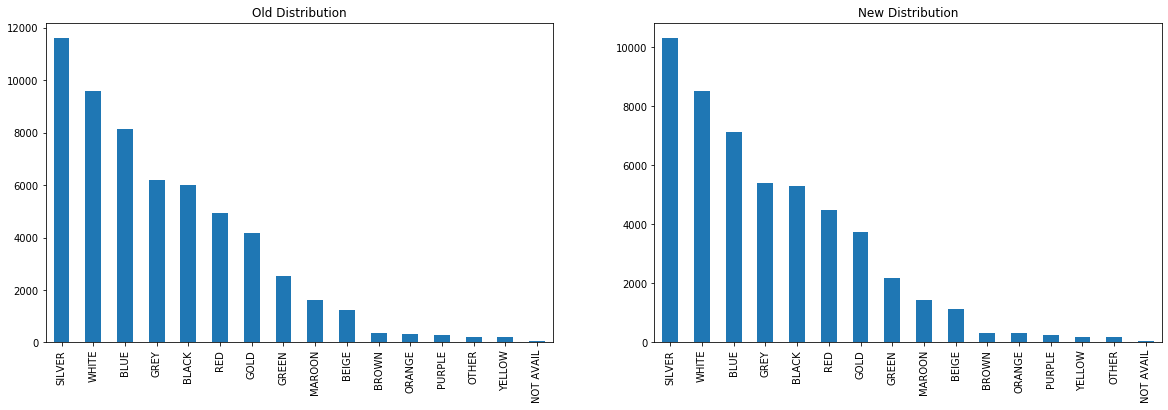

Numero valori unici pre: 16
Numero valori unici post: 16

Conta occorrenze valori unici pre
SILVER       11621
WHITE         9595
BLUE          8146
GREY          6197
BLACK         5997
RED           4950
GOLD          4181
GREEN         2517
MAROON        1606
BEIGE         1240
BROWN          345
ORANGE         335
PURPLE         289
OTHER          198
YELLOW         198
NOT AVAIL       73
Name: Color, dtype: int64

Conta occorrenze valori unici post
SILVER       10313
WHITE         8510
BLUE          7122
GREY          5403
BLACK         5295
RED           4479
GOLD          3729
GREEN         2184
MAROON        1421
BEIGE         1135
BROWN          315
ORANGE         311
PURPLE         253
YELLOW         193
OTHER          172
NOT AVAIL       64
Name: Color, dtype: int64

I valori ripetuti una volta nel pre sono:
Series([], Name: Color, dtype: int64)

I valori ripetuti una volta nel post sono:
Series([], Name: Color, dtype: int64)






Transmission


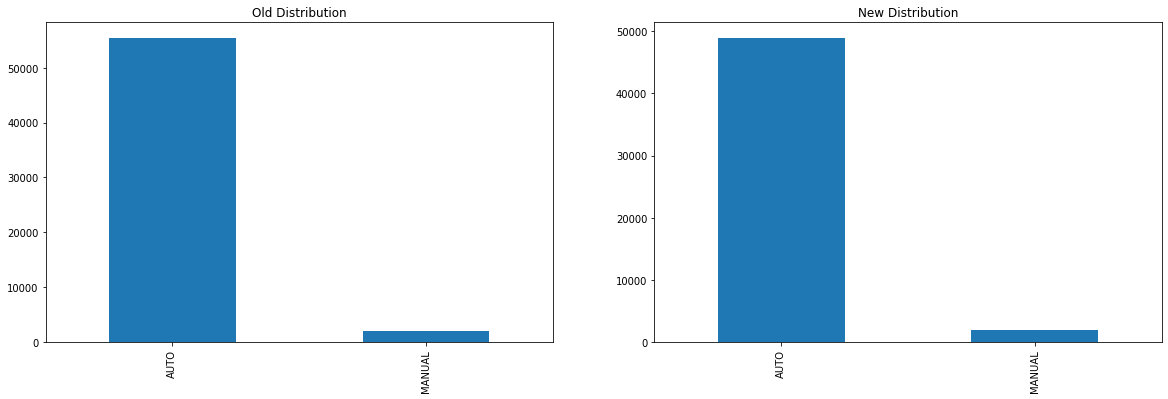

Numero valori unici pre: 2
Numero valori unici post: 2

Conta occorrenze valori unici pre
AUTO      55485
MANUAL     2010
Name: Transmission, dtype: int64

Conta occorrenze valori unici post
AUTO      48988
MANUAL     1918
Name: Transmission, dtype: int64

I valori ripetuti una volta nel pre sono:
Series([], Name: Transmission, dtype: int64)

I valori ripetuti una volta nel post sono:
Series([], Name: Transmission, dtype: int64)






WheelTypeID


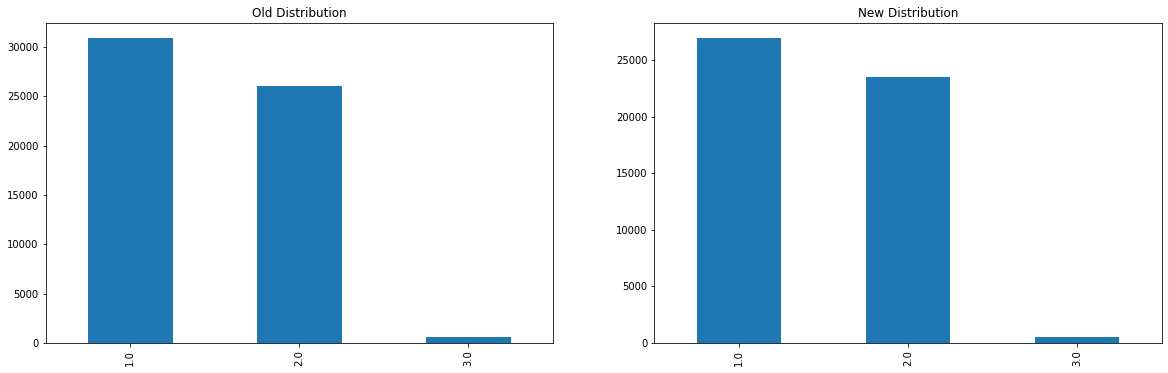

Numero valori unici pre: 3
Numero valori unici post: 3

Conta occorrenze valori unici pre
1.0    30852
2.0    26067
3.0      576
Name: WheelTypeID, dtype: int64

Conta occorrenze valori unici post
1.0    26928
2.0    23473
3.0      505
Name: WheelTypeID, dtype: int64

I valori ripetuti una volta nel pre sono:
Series([], Name: WheelTypeID, dtype: int64)

I valori ripetuti una volta nel post sono:
Series([], Name: WheelTypeID, dtype: int64)






WheelType


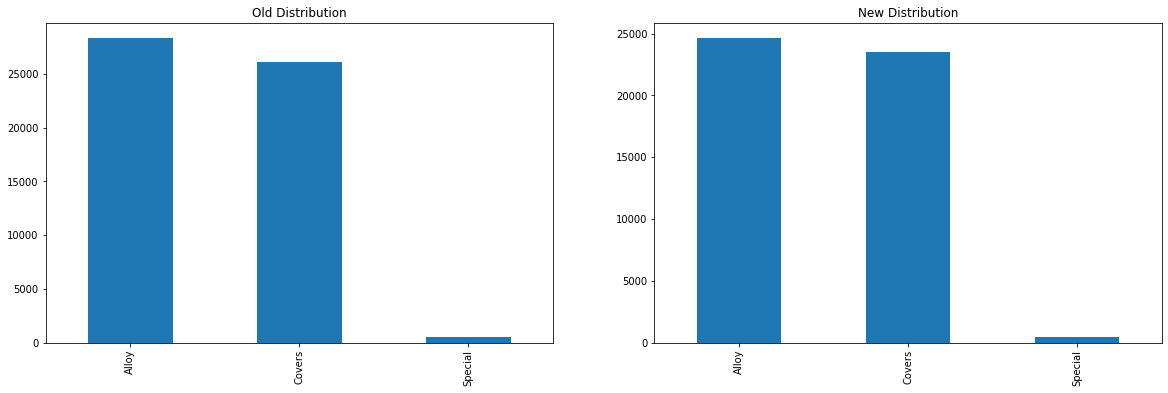

Numero valori unici pre: 3
Numero valori unici post: 3

Conta occorrenze valori unici pre
Alloy      28302
Covers     26067
Special      576
Name: WheelType, dtype: int64

Conta occorrenze valori unici post
Alloy      24622
Covers     23473
Special      505
Name: WheelType, dtype: int64

I valori ripetuti una volta nel pre sono:
Series([], Name: WheelType, dtype: int64)

I valori ripetuti una volta nel post sono:
Series([], Name: WheelType, dtype: int64)






Nationality


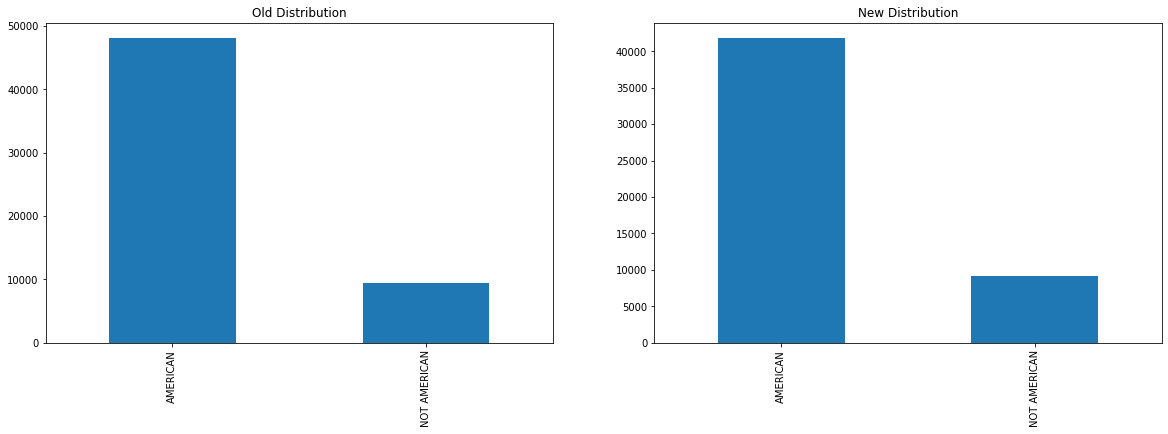

Numero valori unici pre: 2
Numero valori unici post: 2

Conta occorrenze valori unici pre
AMERICAN        48068
NOT AMERICAN     9427
Name: Nationality, dtype: int64

Conta occorrenze valori unici post
AMERICAN        41807
NOT AMERICAN     9099
Name: Nationality, dtype: int64

I valori ripetuti una volta nel pre sono:
Series([], Name: Nationality, dtype: int64)

I valori ripetuti una volta nel post sono:
Series([], Name: Nationality, dtype: int64)






Size


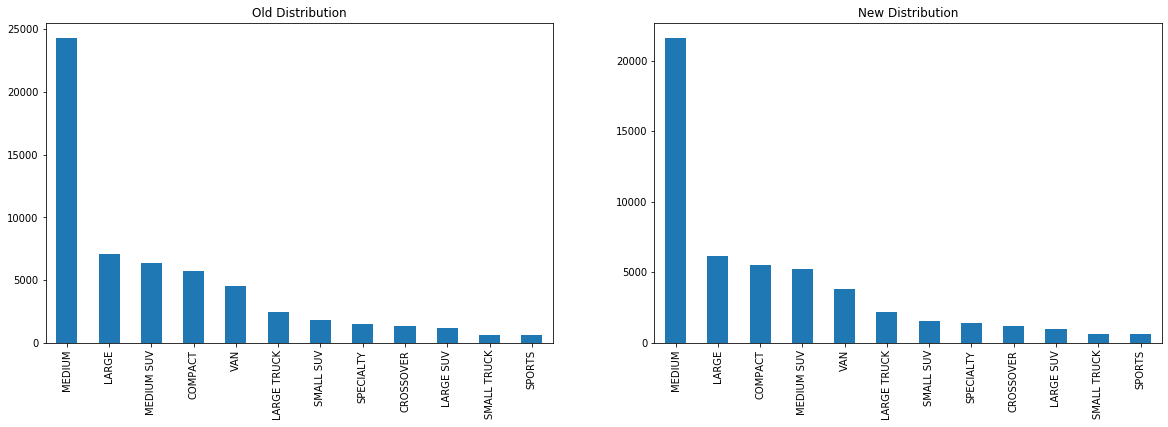

Numero valori unici pre: 12
Numero valori unici post: 12

Conta occorrenze valori unici pre
MEDIUM         24287
LARGE           7076
MEDIUM SUV      6335
COMPACT         5714
VAN             4546
LARGE TRUCK     2439
SMALL SUV       1783
SPECIALTY       1521
CROSSOVER       1374
LARGE SUV       1144
SMALL TRUCK      656
SPORTS           620
Name: Size, dtype: int64

Conta occorrenze valori unici post
MEDIUM         21577
LARGE           6184
COMPACT         5541
MEDIUM SUV      5238
VAN             3780
LARGE TRUCK     2172
SMALL SUV       1572
SPECIALTY       1396
CROSSOVER       1188
LARGE SUV       1000
SMALL TRUCK      645
SPORTS           613
Name: Size, dtype: int64

I valori ripetuti una volta nel pre sono:
Series([], Name: Size, dtype: int64)

I valori ripetuti una volta nel post sono:
Series([], Name: Size, dtype: int64)






TopThreeAmericanName


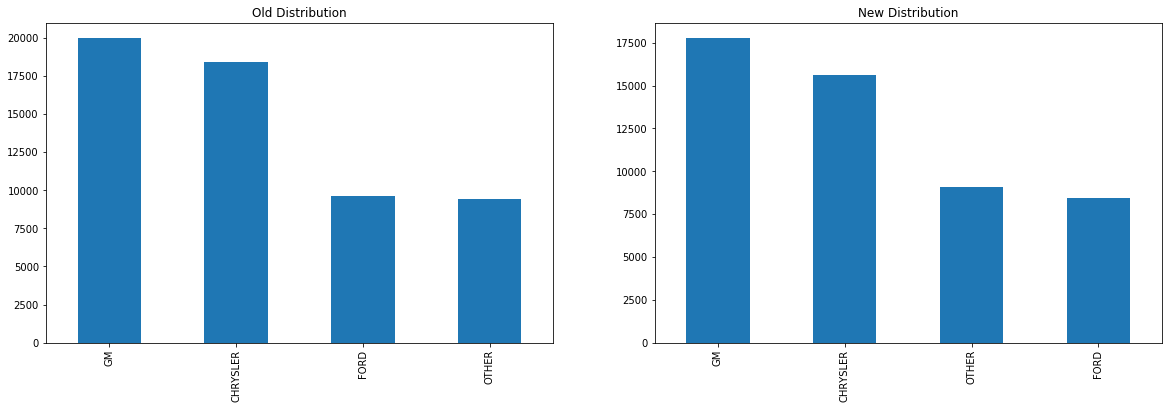

Numero valori unici pre: 4
Numero valori unici post: 4

Conta occorrenze valori unici pre
GM          19977
CHRYSLER    18442
FORD         9649
OTHER        9427
Name: TopThreeAmericanName, dtype: int64

Conta occorrenze valori unici post
GM          17765
CHRYSLER    15629
OTHER        9099
FORD         8413
Name: TopThreeAmericanName, dtype: int64

I valori ripetuti una volta nel pre sono:
Series([], Name: TopThreeAmericanName, dtype: int64)

I valori ripetuti una volta nel post sono:
Series([], Name: TopThreeAmericanName, dtype: int64)






PRIMEUNIT


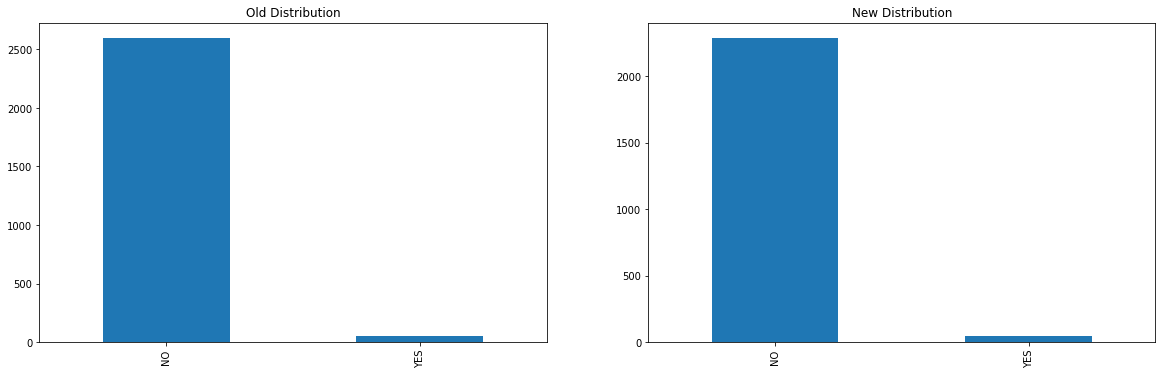

Numero valori unici pre: 2
Numero valori unici post: 2

Conta occorrenze valori unici pre
NO     2598
YES      56
Name: PRIMEUNIT, dtype: int64

Conta occorrenze valori unici post
NO     2287
YES      46
Name: PRIMEUNIT, dtype: int64

I valori ripetuti una volta nel pre sono:
Series([], Name: PRIMEUNIT, dtype: int64)

I valori ripetuti una volta nel post sono:
Series([], Name: PRIMEUNIT, dtype: int64)






AUCGUART


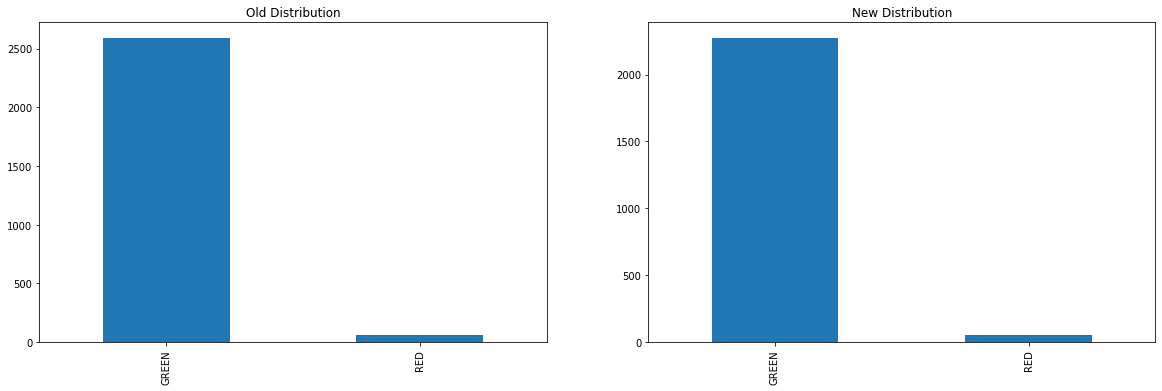

Numero valori unici pre: 2
Numero valori unici post: 2

Conta occorrenze valori unici pre
GREEN    2593
RED        61
Name: AUCGUART, dtype: int64

Conta occorrenze valori unici post
GREEN    2276
RED        57
Name: AUCGUART, dtype: int64

I valori ripetuti una volta nel pre sono:
Series([], Name: AUCGUART, dtype: int64)

I valori ripetuti una volta nel post sono:
Series([], Name: AUCGUART, dtype: int64)






BYRNO


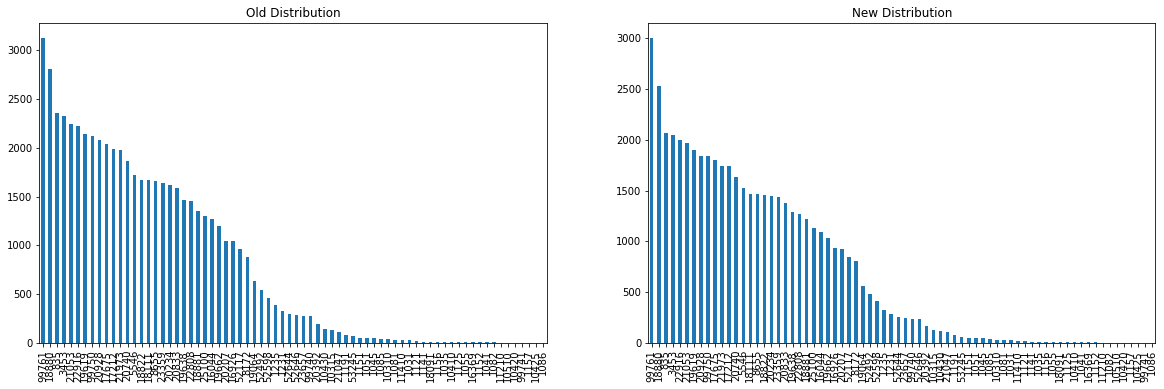

Numero valori unici pre: 72
Numero valori unici post: 72

Conta occorrenze valori unici pre
99761    3123
18880    2811
835      2362
3453     2323
21053    2244
         ... 
10420       2
99741       1
1157        1
10425       1
1086        1
Name: BYRNO, Length: 72, dtype: int64

Conta occorrenze valori unici post
99761    2998
18880    2529
835      2071
3453     2043
22916    2001
         ... 
10420       2
1157        1
10425       1
99741       1
1086        1
Name: BYRNO, Length: 72, dtype: int64

I valori ripetuti una volta nel pre sono:
99741    1
1157     1
10425    1
1086     1
Name: BYRNO, dtype: int64

I valori ripetuti una volta nel post sono:
1157     1
10425    1
99741    1
1086     1
Name: BYRNO, dtype: int64






VNZIP1


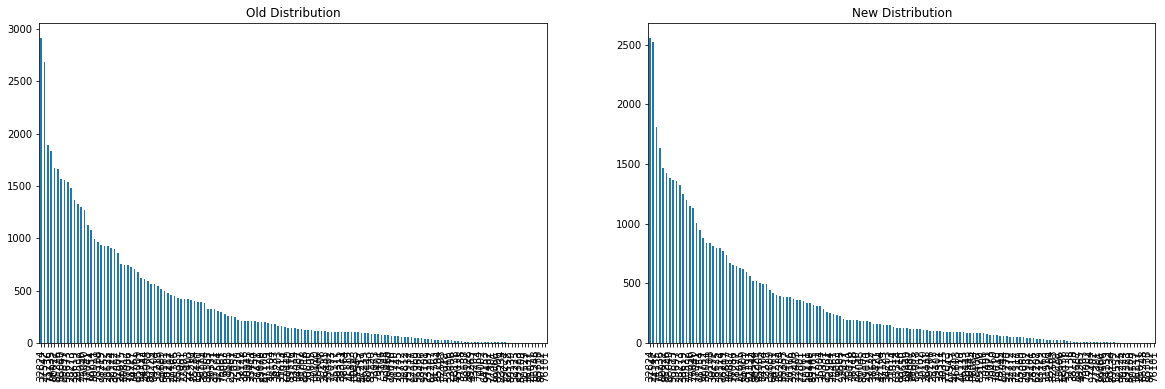

Numero valori unici pre: 152
Numero valori unici post: 152

Conta occorrenze valori unici pre
32824    2911
27542    2682
75236    1895
74135    1833
80022    1670
         ... 
25071       1
85248       1
85338       1
80112       1
76101       1
Name: VNZIP1, Length: 152, dtype: int64

Conta occorrenze valori unici post
32824    2554
27542    2525
74135    1807
75236    1632
80022    1471
         ... 
25071       1
85248       1
85338       1
80112       1
76101       1
Name: VNZIP1, Length: 152, dtype: int64

I valori ripetuti una volta nel pre sono:
25071    1
85248    1
85338    1
80112    1
76101    1
Name: VNZIP1, dtype: int64

I valori ripetuti una volta nel post sono:
25071    1
85248    1
85338    1
80112    1
76101    1
Name: VNZIP1, dtype: int64






VNST


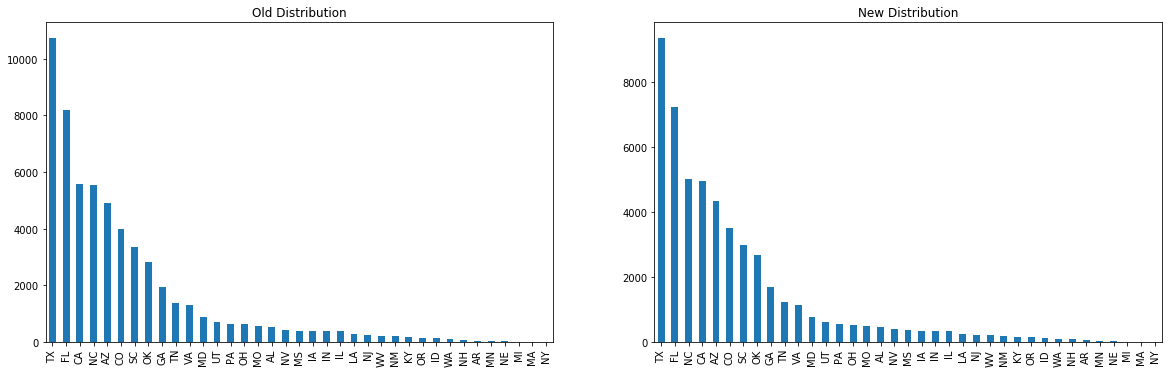

Numero valori unici pre: 37
Numero valori unici post: 37

Conta occorrenze valori unici pre
TX    10752
FL     8184
CA     5585
NC     5541
AZ     4895
CO     3976
SC     3342
OK     2837
GA     1929
TN     1388
VA     1310
MD      902
UT      695
PA      646
OH      621
MO      584
AL      540
NV      427
MS      403
IA      388
IN      384
IL      373
LA      272
NJ      261
WV      222
NM      199
KY      182
OR      157
ID      155
WA      111
NH       80
AR       54
MN       51
NE       23
MI       11
MA       11
NY        4
Name: VNST, dtype: int64

Conta occorrenze valori unici post
TX    9380
FL    7239
NC    5032
CA    4946
AZ    4349
CO    3501
SC    2984
OK    2677
GA    1706
TN    1226
VA    1129
MD     761
UT     612
PA     542
OH     531
MO     482
AL     454
NV     409
MS     361
IA     334
IN     331
IL     328
LA     239
NJ     224
WV     206
NM     183
KY     155
OR     143
ID     134
WA      89
NH      80
AR      49
MN      46
NE      21
MI      10
MA      10
NY     

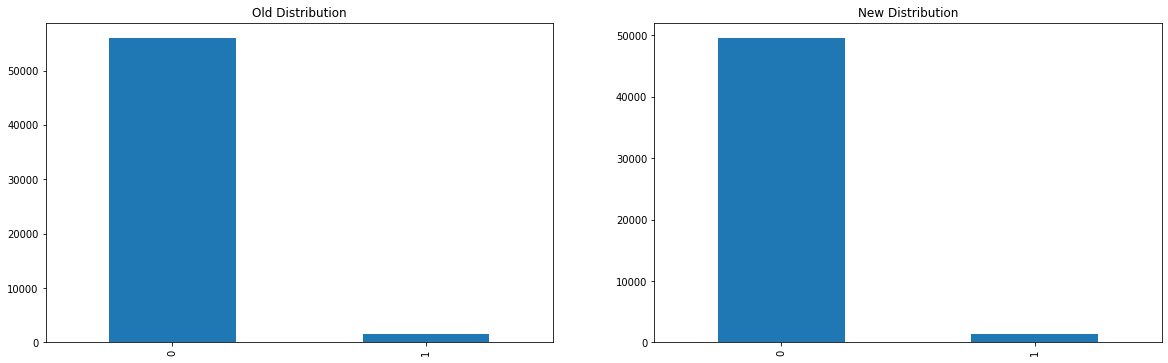

Numero valori unici pre: 2
Numero valori unici post: 2

Conta occorrenze valori unici pre
0    56006
1     1489
Name: IsOnlineSale, dtype: int64

Conta occorrenze valori unici post
0    49611
1     1295
Name: IsOnlineSale, dtype: int64

I valori ripetuti una volta nel pre sono:
Series([], Name: IsOnlineSale, dtype: int64)

I valori ripetuti una volta nel post sono:
Series([], Name: IsOnlineSale, dtype: int64)






Model


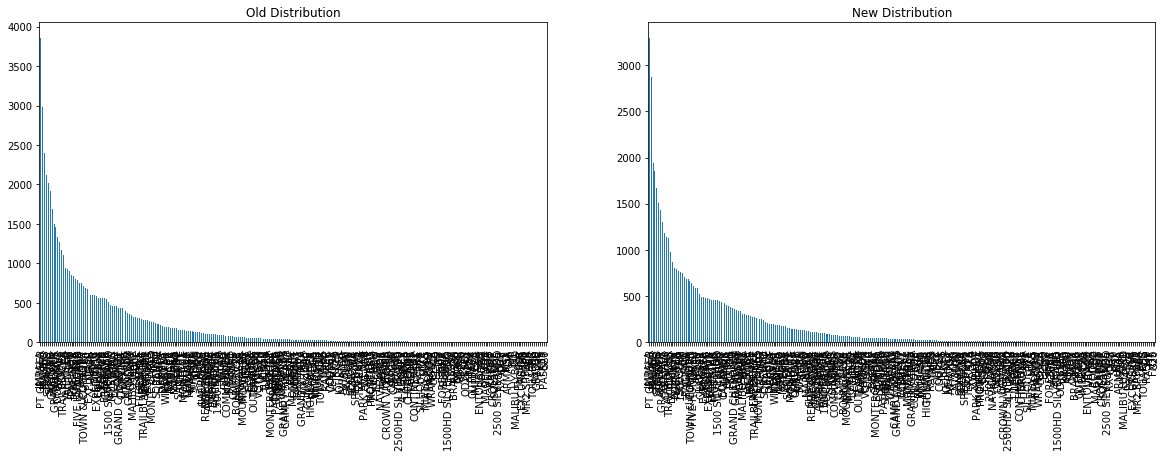

Numero valori unici pre: 261
Numero valori unici post: 261

Conta occorrenze valori unici pre
IMPALA        3861
PT CRUISER    2988
MALIBU        2395
TAURUS        2117
STRATUS       2016
              ... 
GS450H           1
LHS              1
FX35             1
PASSAT           1
G20              1
Name: Model, Length: 261, dtype: int64

Conta occorrenze valori unici post
IMPALA        3298
PT CRUISER    2876
MALIBU        1944
TAURUS        1857
SEBRING       1669
              ... 
RX330            1
H3               1
FIT              1
FX35             1
G20              1
Name: Model, Length: 261, dtype: int64

I valori ripetuti una volta nel pre sono:
FIT              1
CL               1
MALIBU HYBRID    1
Pacifica         1
G8               1
EXCURSION        1
I-290            1
IS300            1
MR2 SPYDER       1
S60              1
H3               1
TOUAREG          1
RX330            1
GS450H           1
LHS              1
FX35             1
PASSAT           1
G20     

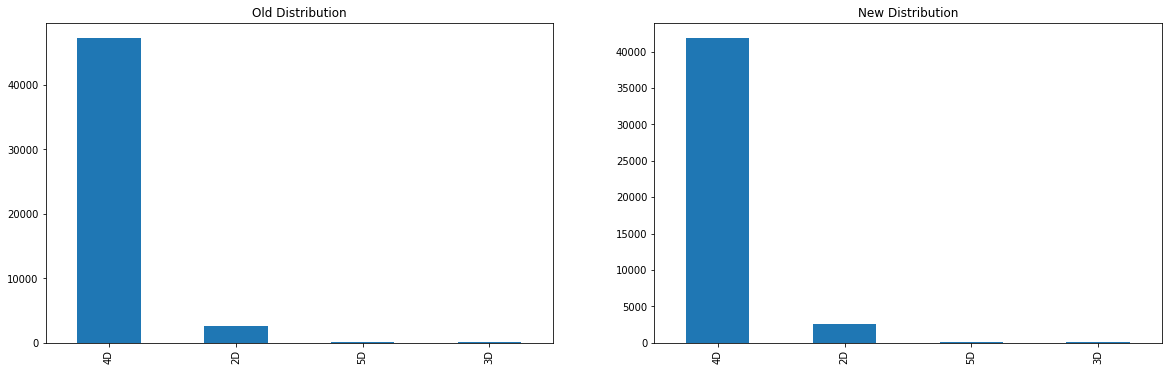

Numero valori unici pre: 4
Numero valori unici post: 4

Conta occorrenze valori unici pre
4D    47279
2D     2624
5D       68
3D       39
Name: Doors, dtype: int64

Conta occorrenze valori unici post
4D    41852
2D     2542
5D       64
3D       39
Name: Doors, dtype: int64

I valori ripetuti una volta nel pre sono:
Series([], Name: Doors, dtype: int64)

I valori ripetuti una volta nel post sono:
Series([], Name: Doors, dtype: int64)






SubModel


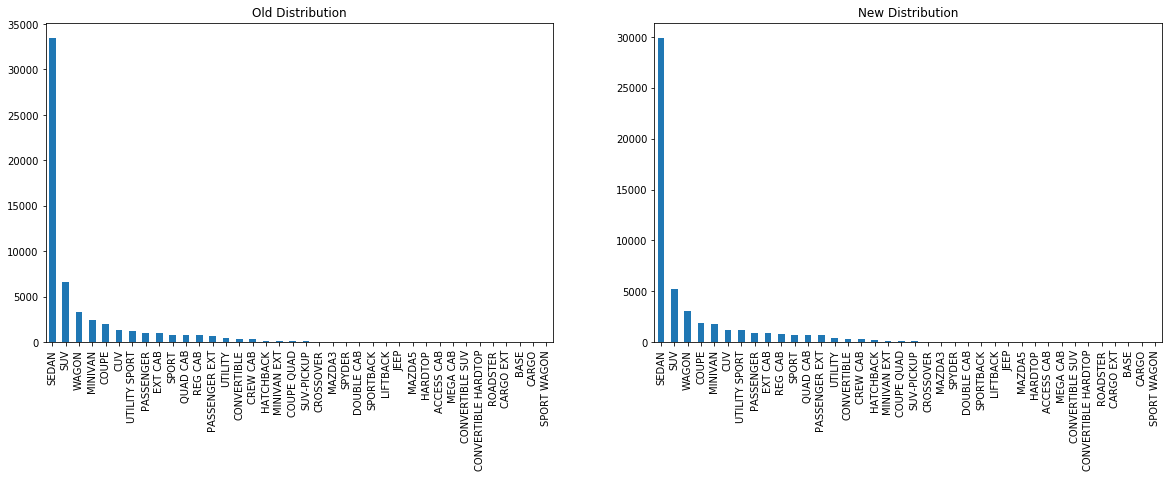

Numero valori unici pre: 38
Numero valori unici post: 38

Conta occorrenze valori unici pre
SEDAN                  33473
SUV                     6592
WAGON                   3290
MINIVAN                 2418
COUPE                   1962
CUV                     1373
UTILITY SPORT           1271
PASSENGER               1002
EXT CAB                  985
SPORT                    846
QUAD CAB                 840
REG CAB                  807
PASSENGER EXT            741
UTILITY                  476
CONVERTIBLE              372
CREW CAB                 341
HATCHBACK                185
MINIVAN EXT              174
COUPE QUAD               110
SUV-PICKUP               103
CROSSOVER                 43
MAZDA3                    17
SPYDER                    13
DOUBLE CAB                12
SPORTBACK                 11
LIFTBACK                   6
JEEP                       6
MAZDA5                     5
HARDTOP                    4
ACCESS CAB                 3
MEGA CAB                   3
CONVERTIB

In [62]:
for Variable in categories:
    if Variable in pre.columns:
        
        compare= comp and Variable in post.columns
        print(Variable)
        
        #Codice dei bar chart
        # Set up a grid of plots
        fig = plt.figure(figsize=(20, 20)) 
        fig_dims = (3, 2)

        # Plot old Distribution
        plt.subplot2grid(fig_dims, (0, 0))
        pre[Variable].value_counts().plot(kind="bar", title=titlePre)

        # Plot new Distribution
        if compare:
            plt.subplot2grid(fig_dims, (0, 1))
            post[Variable].value_counts().plot(kind="bar", title=titlePost)

        plt.show()
        
        
        #Codice dei valori unici
        preNu=pre[Variable].nunique()
        if compare:
            postNu=post[Variable].nunique()
            print('Numero valori unici pre: '+str(preNu))
            print('Numero valori unici post: '+str(postNu)+'\n')
        else:
            print('Numero valori unici pre: '+str(preNu)+'\n')
            
        
        #Codice per il conto dei valori unici
        preValue=pre[Variable].value_counts()
        if compare:
            postValue=post[Variable].value_counts()
            print('Conta occorrenze valori unici pre')
            print(str(preValue)+'\n')
            print('Conta occorrenze valori unici post')
            print(str(postValue)+'\n')
        else:
            print('Conta occorrenze valori unici pre')
            print(str(preValue)+'\n')
        
        
        #Codice per identificare i valori poco ripetuti
        ModelCount=pre[Variable].value_counts()
        preOut=ModelCount.loc[pre[Variable].value_counts()<2]
        
        if compare:
            ModelCount=post[Variable].value_counts()
            postOut=ModelCount.loc[post[Variable].value_counts()<2]
            print('I valori ripetuti una volta nel pre sono:')
            print(str(preOut)+'\n')
            print('I valori ripetuti una volta nel post sono:')
            print(str(postOut)+'\n')
        else:
            print('I valori ripetuti una volta nel pre sono:')
            print(str(preOut)+'\n')
        
        print('\n\n\n\n')

# Analisi Comulativa Variabili Numeriche

In [63]:
pre[num_catProp].describe()

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost,VehOdo
count,57495.000000,57495.000000,57495.000000,57495.000000,57495.000000,57495.000000,57495.000000,57495.000000,57495.000000,57495.000000,57495.000000
mean,6198.065084,7457.819993,8599.018245,9969.808505,6173.311679,7440.128446,8832.648317,10211.252265,6728.992582,1276.112636,71493.322950
std,2382.258379,2615.492370,3035.890139,3230.751833,2387.626833,2621.337211,3011.654177,3208.728344,1763.872675,597.742215,14580.483917
min,884.000000,1076.000000,1455.000000,1662.000000,369.000000,494.000000,899.000000,1034.000000,1.000000,462.000000,4825.000000
25%,4341.000000,5484.000000,6374.000000,7577.000000,4311.000000,5464.000000,6586.500000,7838.000000,5430.000000,837.000000,61809.000000
50%,6139.000000,7361.000000,8489.000000,9856.000000,6086.000000,7339.000000,8756.000000,10126.000000,6700.000000,1155.000000,73363.000000
75%,7783.000000,9042.500000,10686.000000,12115.000000,7749.000000,9025.000000,10921.000000,12318.000000,7900.000000,1623.000000,82430.000000
max,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,36485.000000,7498.000000,115717.000000


In [64]:
table=[]
if comp:
    table=post[num_catProp].describe()
table

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost,VehOdo
count,50906.000000,50906.000000,50906.000000,50906.000000,50906.000000,50906.000000,50906.000000,50906.000000,50906.000000,50906.000000,50906.000000
mean,6129.684143,7373.046566,8523.758280,9876.741740,6104.445488,7355.075001,8752.638216,10115.245845,6682.527473,1269.777453,71314.278513
std,2396.709668,2626.154534,3045.766321,3238.549381,2398.985995,2629.252121,3018.981050,3213.500791,1769.612843,614.583943,14696.348324
min,884.000000,1076.000000,1455.000000,1662.000000,369.000000,494.000000,899.000000,1034.000000,1.000000,462.000000,5368.000000
25%,4256.000000,5369.000000,6287.000000,7499.000000,4235.000000,5348.000000,6515.000000,7736.000000,5385.000000,834.000000,61502.000000
50%,6061.000000,7260.000000,8411.000000,9756.000000,5994.000000,7231.000000,8656.000000,10013.000000,6655.000000,1155.000000,73173.000000
75%,7710.750000,8941.000000,10612.000000,12011.000000,7680.000000,8927.000000,10834.000000,12239.000000,7855.000000,1623.000000,82345.750000
max,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,36485.000000,7498.000000,115717.000000


In [65]:
pre[num_catProp].corr()

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost,VehOdo
MMRAcquisitionAuctionAveragePrice,1.000000,0.989772,0.903108,0.903047,0.955851,0.949984,0.888425,0.887520,0.823377,-0.050448,-0.017695
MMRAcquisitionAuctionCleanPrice,0.989772,1.000000,0.893501,0.910174,0.943670,0.952418,0.878844,0.889781,0.820677,-0.019179,0.026083
MMRAcquisitionRetailAveragePrice,0.903108,0.893501,1.000000,0.989448,0.866478,0.863008,0.935215,0.927175,0.783035,-0.054958,0.031550
MMRAcquisitonRetailCleanPrice,0.903047,0.910174,0.989448,1.000000,0.864200,0.872397,0.927624,0.930834,0.788091,-0.026946,0.065775
MMRCurrentAuctionAveragePrice,0.955851,0.943670,0.866478,0.864200,1.000000,0.989975,0.911062,0.908402,0.796697,-0.054799,-0.030856
MMRCurrentAuctionCleanPrice,0.949984,0.952418,0.863008,0.872397,0.989975,1.000000,0.903392,0.917092,0.796401,-0.025121,0.011099
MMRCurrentRetailAveragePrice,0.888425,0.878844,0.935215,0.927624,0.911062,0.903392,1.000000,0.989254,0.779123,-0.056745,0.014159
MMRCurrentRetailCleanPrice,0.887520,0.889781,0.927175,0.930834,0.908402,0.917092,0.989254,1.000000,0.782597,-0.029641,0.047767
VehBCost,0.823377,0.820677,0.783035,0.788091,0.796697,0.796401,0.779123,0.782597,1.000000,-0.034538,-0.063405
WarrantyCost,-0.050448,-0.019179,-0.054958,-0.026946,-0.054799,-0.025121,-0.056745,-0.029641,-0.034538,1.000000,0.412177


In [66]:
table=[]
if comp:
    table=post[num_catProp].corr()
table

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost,VehOdo
MMRAcquisitionAuctionAveragePrice,1.000000,0.989809,0.904546,0.904017,0.957081,0.951029,0.890480,0.889119,0.828761,-0.062992,-0.029714
MMRAcquisitionAuctionCleanPrice,0.989809,1.000000,0.895377,0.911503,0.944835,0.953467,0.881047,0.891549,0.826508,-0.031523,0.015570
MMRAcquisitionRetailAveragePrice,0.904546,0.895377,1.000000,0.989619,0.868332,0.864969,0.936613,0.928688,0.788474,-0.064902,0.019460
MMRAcquisitonRetailCleanPrice,0.904017,0.911503,0.989619,1.000000,0.865504,0.873859,0.928815,0.932162,0.793813,-0.037127,0.055023
MMRCurrentAuctionAveragePrice,0.957081,0.944835,0.868332,0.865504,1.000000,0.990021,0.912116,0.909169,0.802113,-0.067549,-0.043128
MMRCurrentAuctionCleanPrice,0.951029,0.953467,0.864969,0.873859,0.990021,1.000000,0.904652,0.917973,0.801950,-0.037427,0.000483
MMRCurrentRetailAveragePrice,0.890480,0.881047,0.936613,0.928815,0.912116,0.904652,1.000000,0.989375,0.783463,-0.067847,0.001819
MMRCurrentRetailCleanPrice,0.889119,0.891549,0.928688,0.932162,0.909169,0.917973,0.989375,1.000000,0.787237,-0.040899,0.036653
VehBCost,0.828761,0.826508,0.788474,0.793813,0.802113,0.801950,0.783463,0.787237,1.000000,-0.041367,-0.068337
WarrantyCost,-0.062992,-0.031523,-0.064902,-0.037127,-0.067549,-0.037427,-0.067847,-0.040899,-0.041367,1.000000,0.408248


VehOdo
FullRangeHist


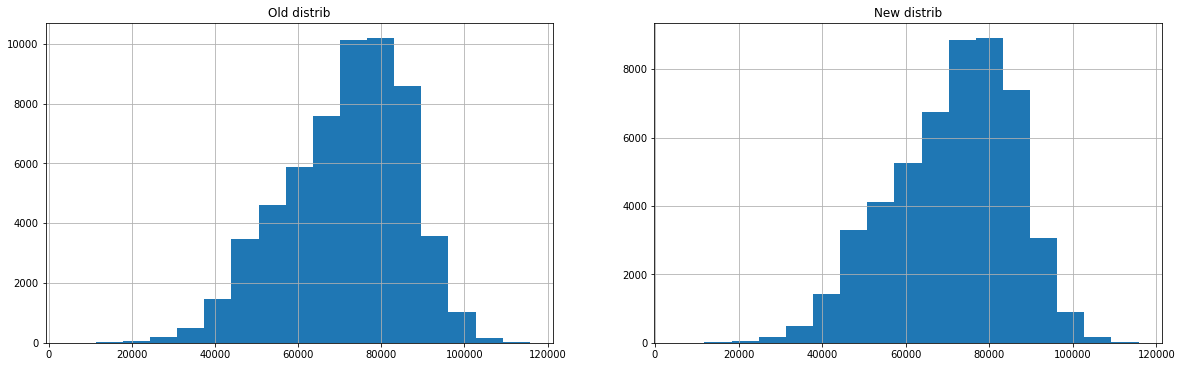

LimSupHist


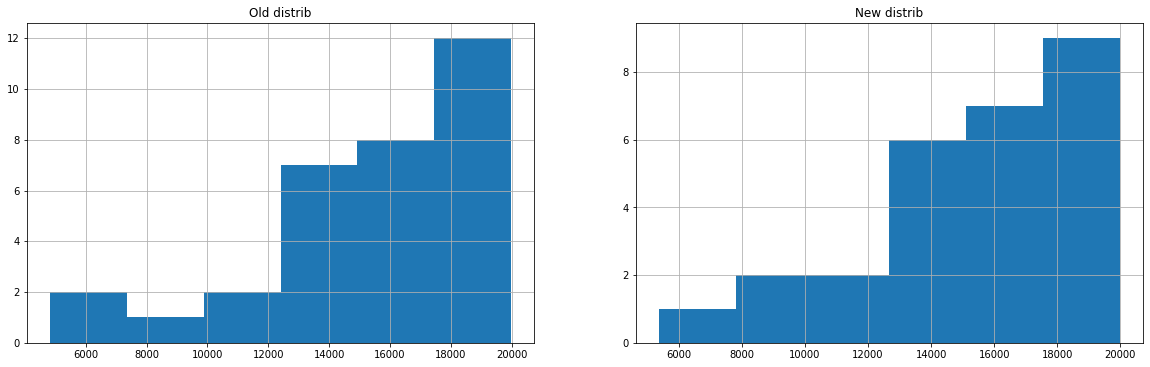

LimBotHist


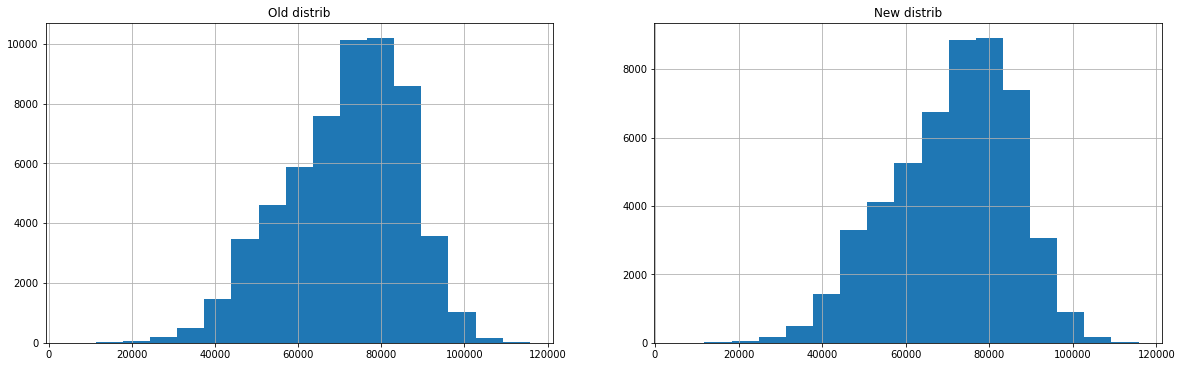

LimBotTopHist


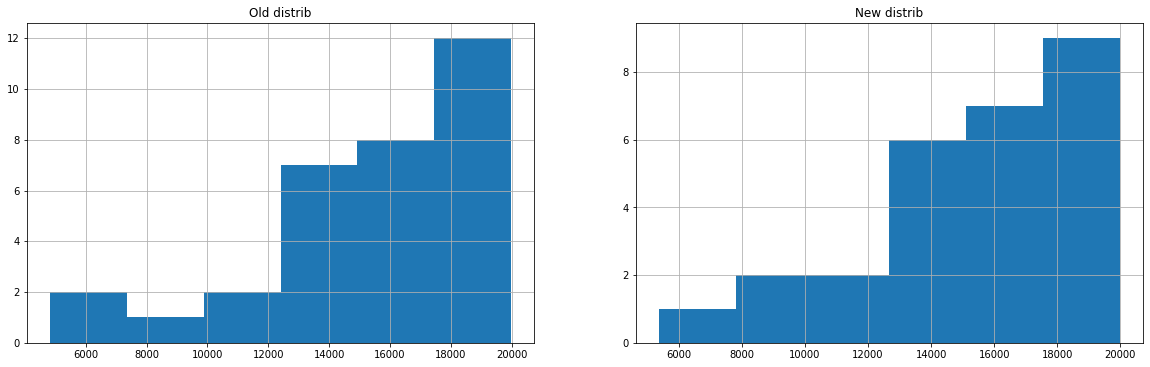

FullRangeDensity


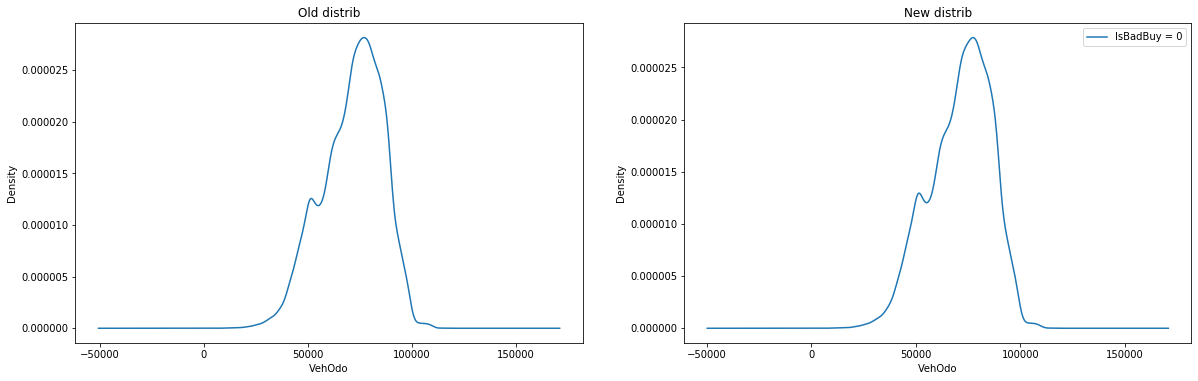

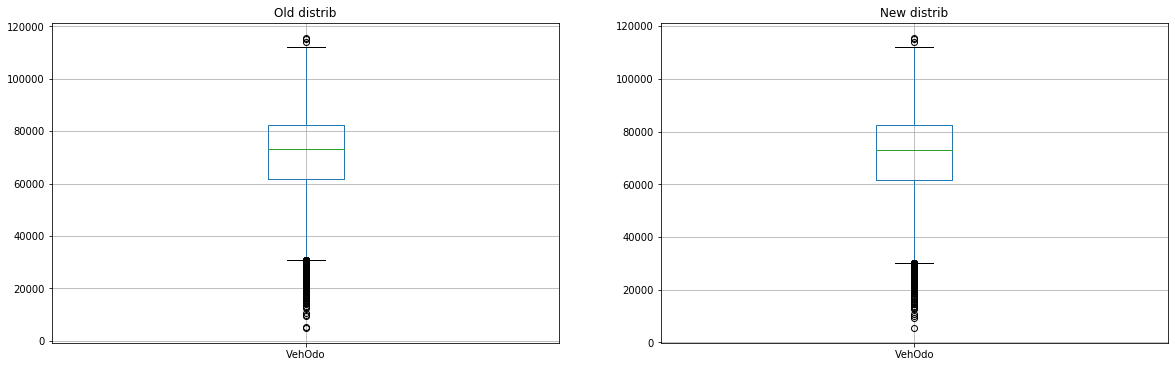






MMRAcquisitionAuctionAveragePrice
FullRangeHist


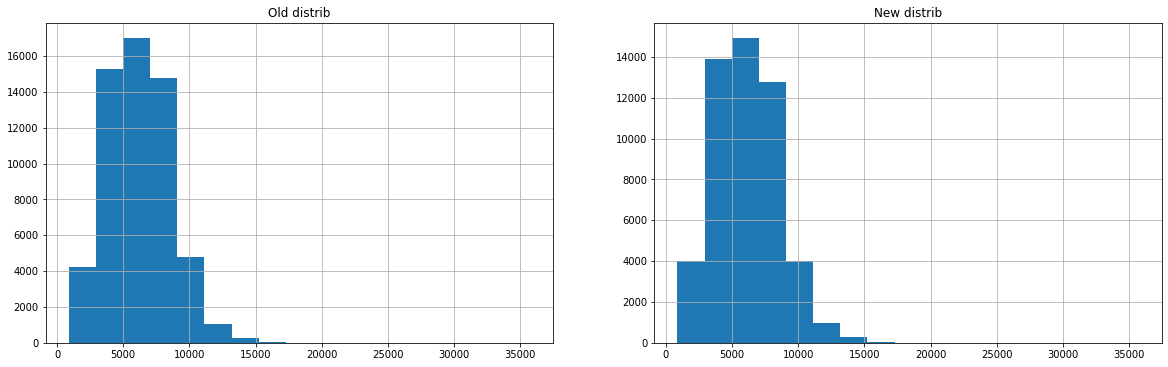

LimSupHist


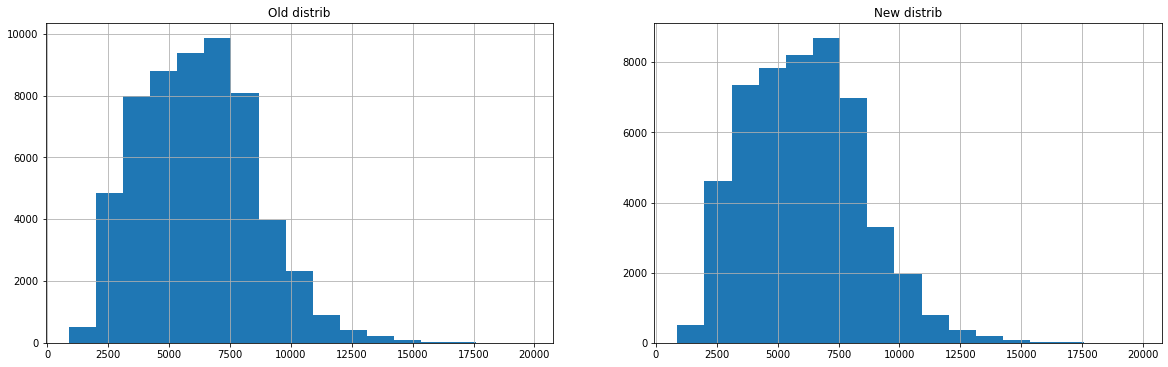

LimBotHist


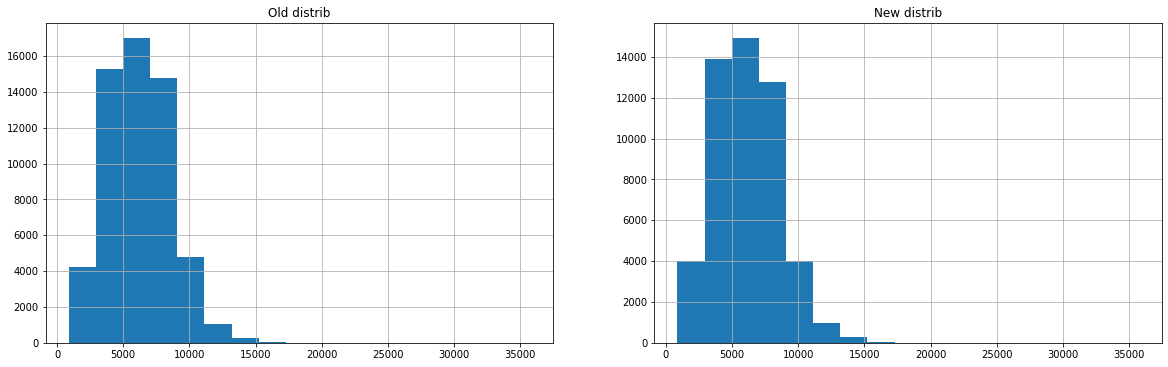

LimBotTopHist


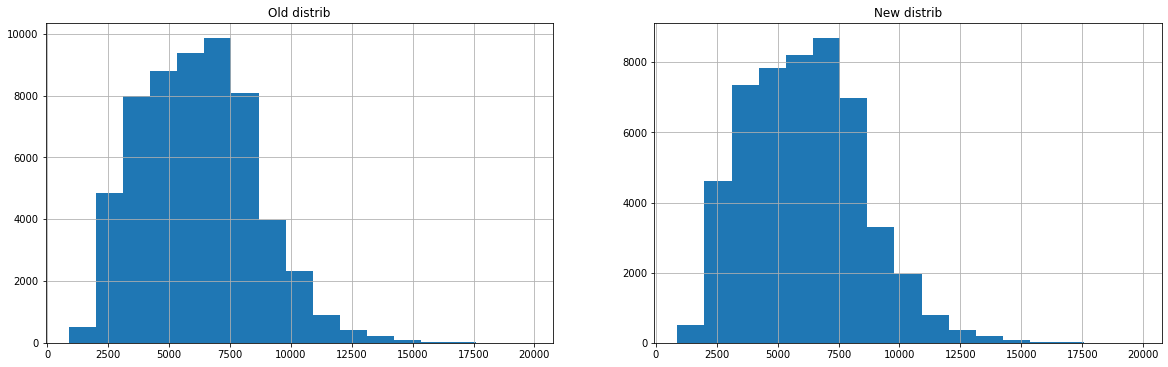

FullRangeDensity


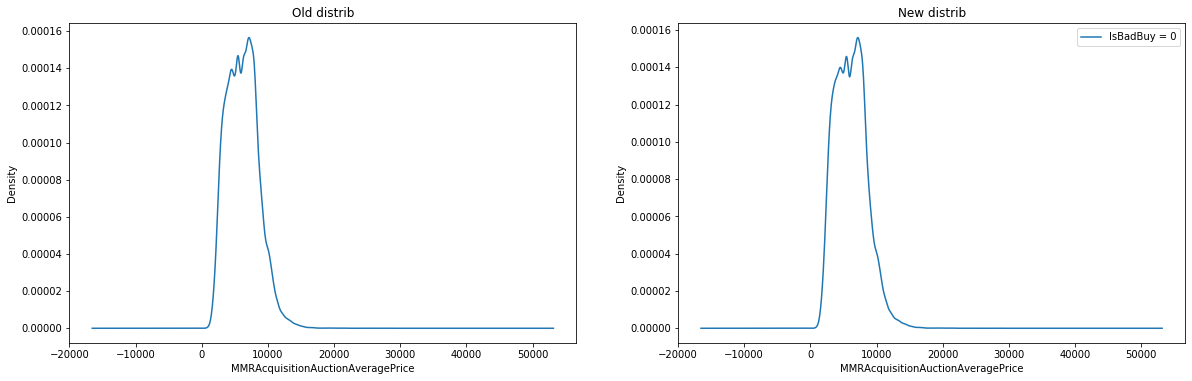

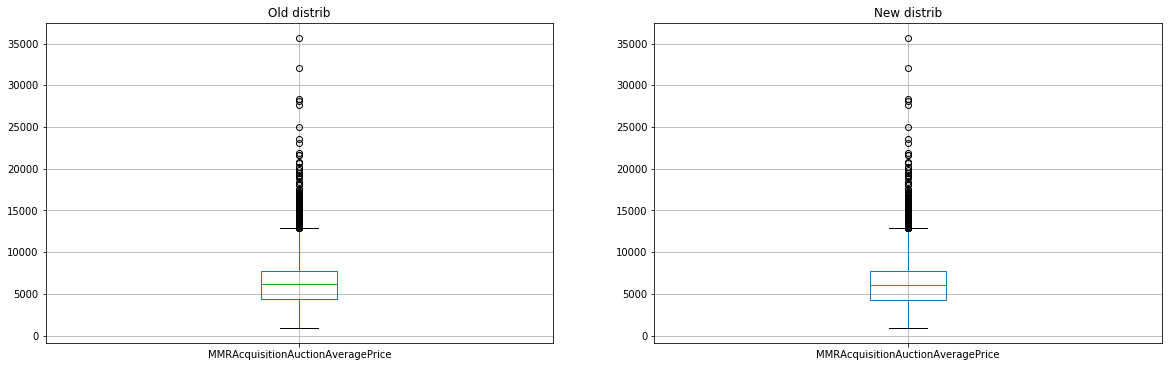






MMRAcquisitionAuctionCleanPrice
FullRangeHist


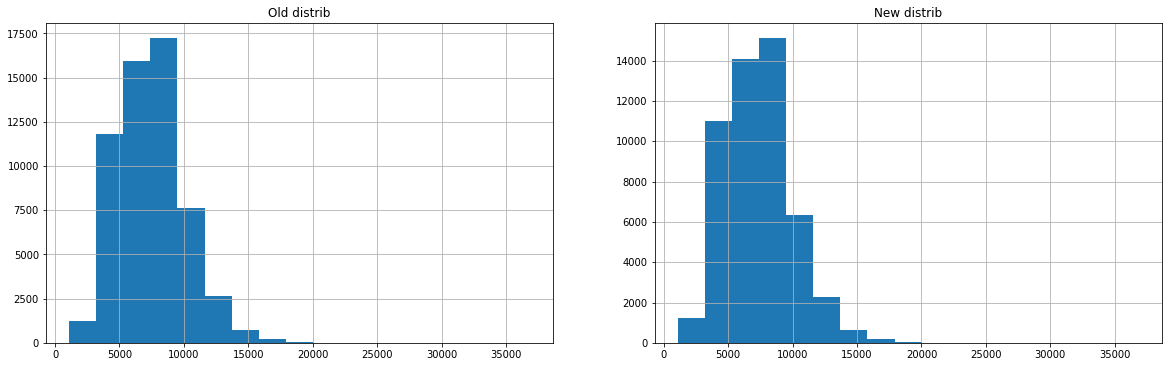

LimSupHist


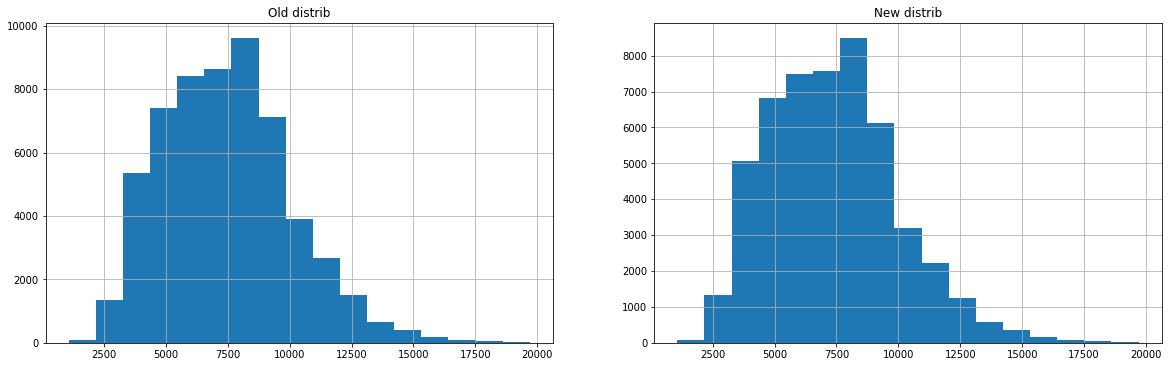

LimBotHist


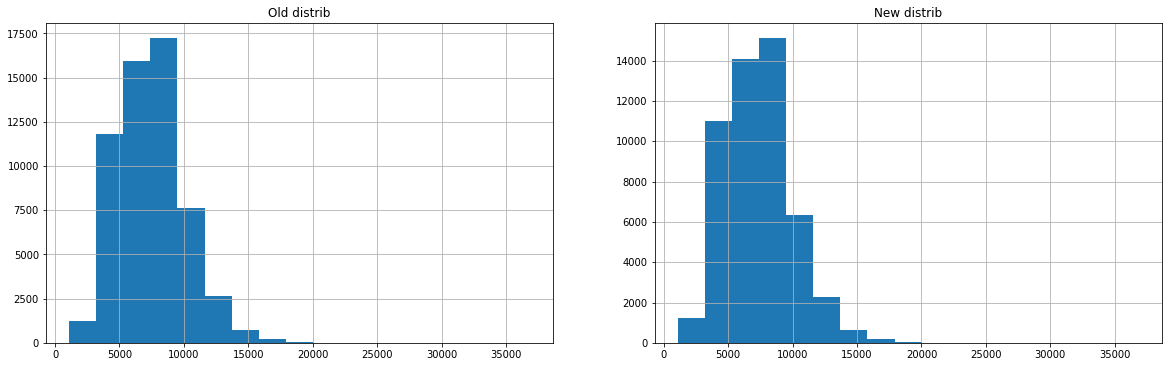

LimBotTopHist


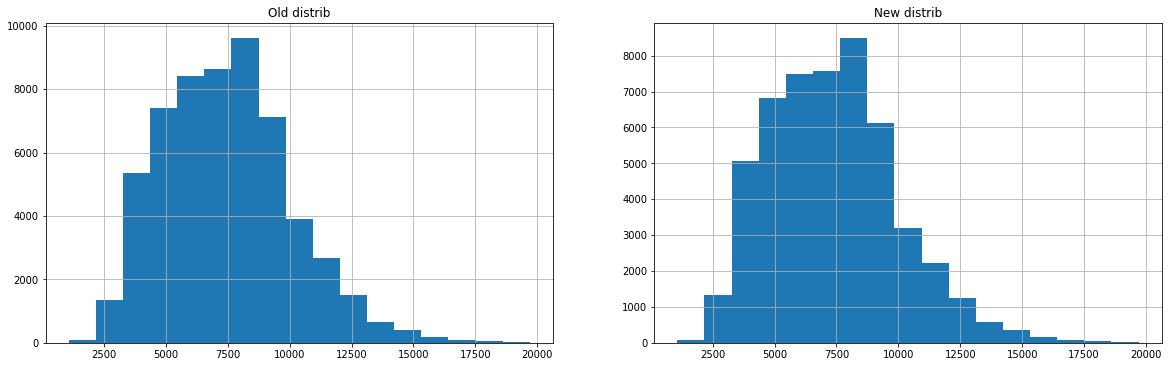

FullRangeDensity


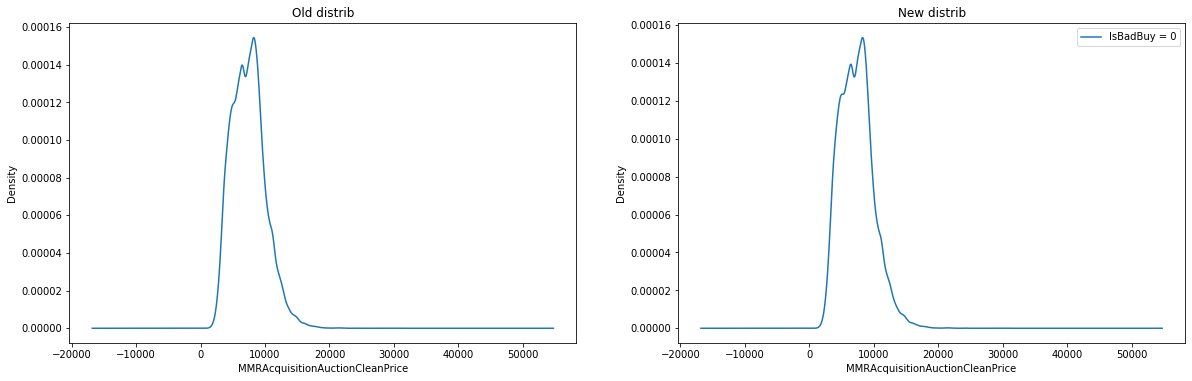

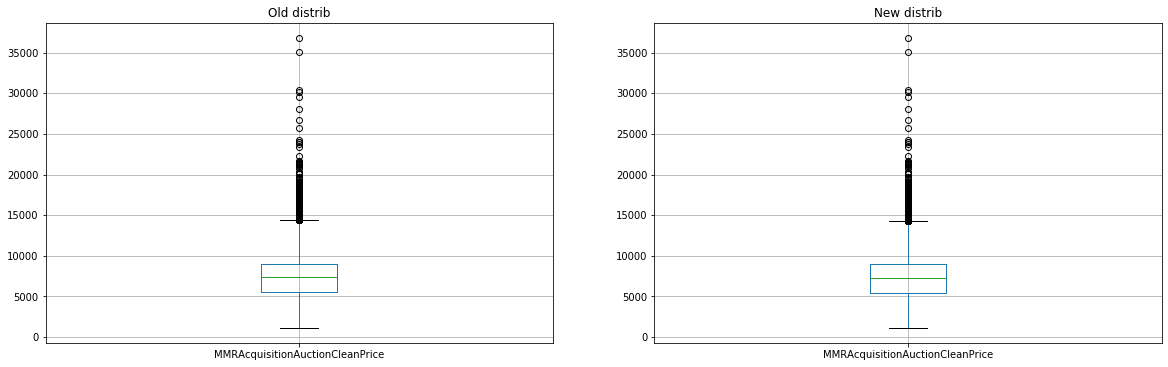






MMRAcquisitionRetailAveragePrice
FullRangeHist


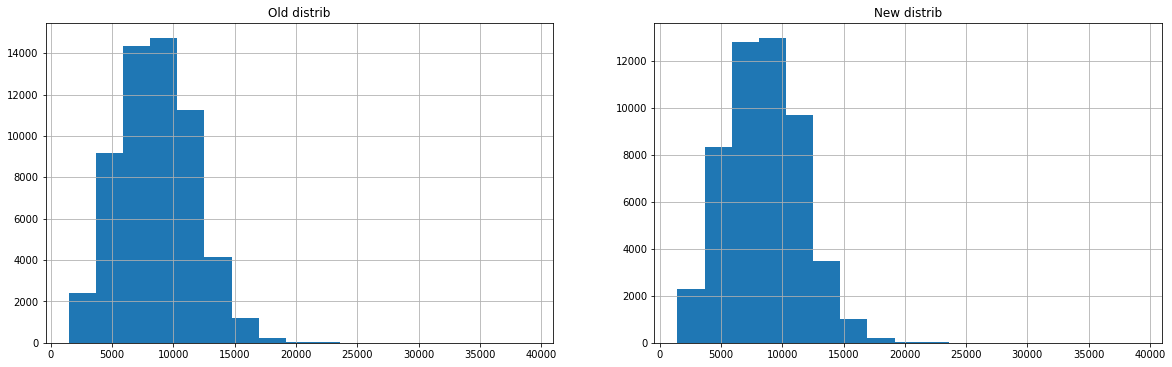

LimSupHist


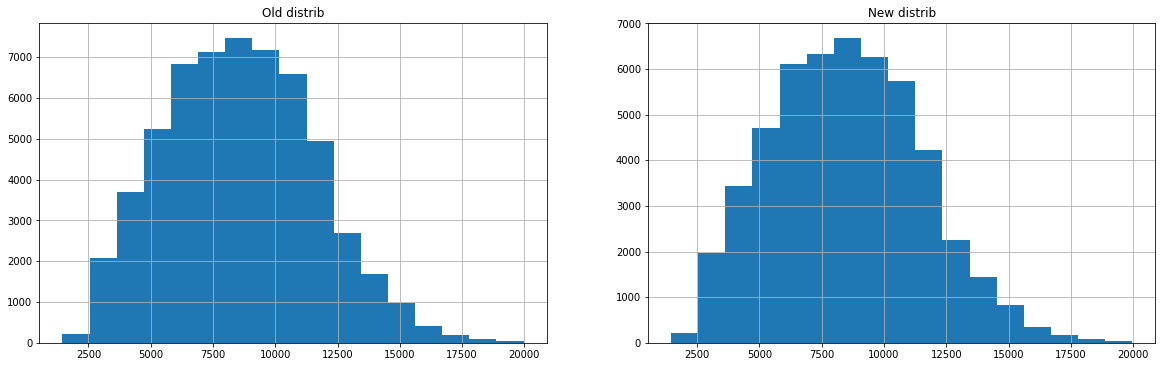

LimBotHist


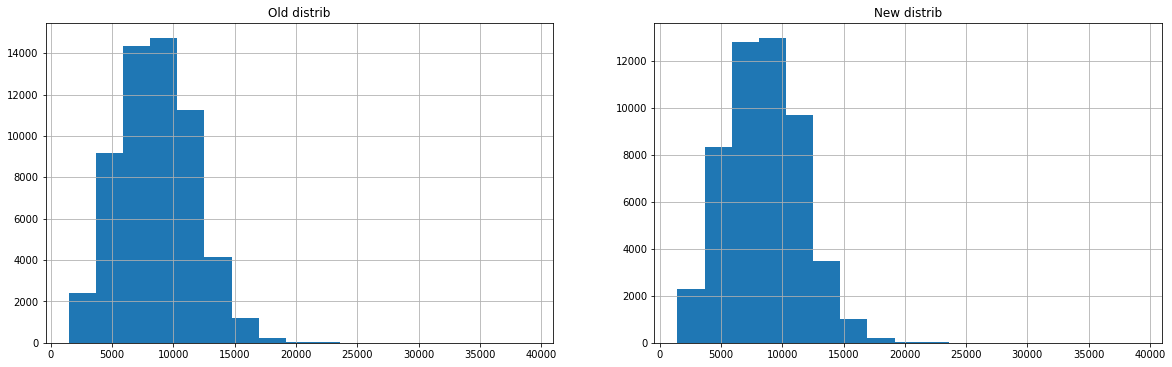

LimBotTopHist


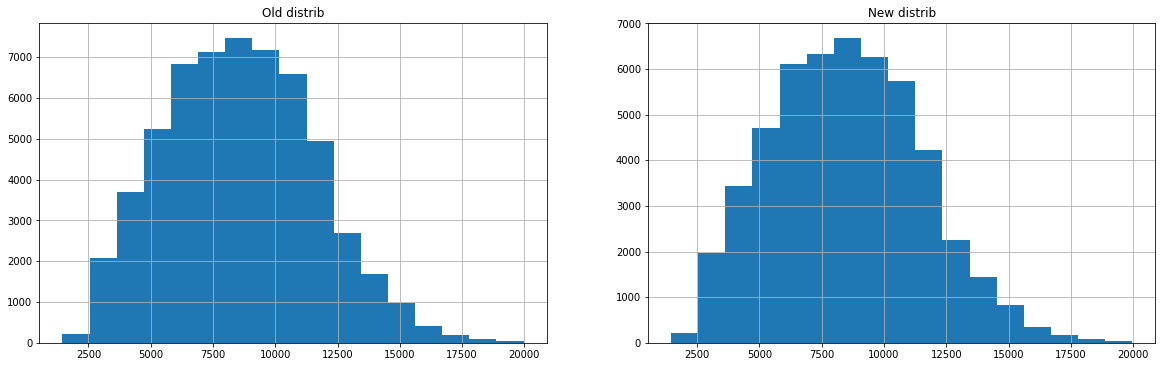

FullRangeDensity


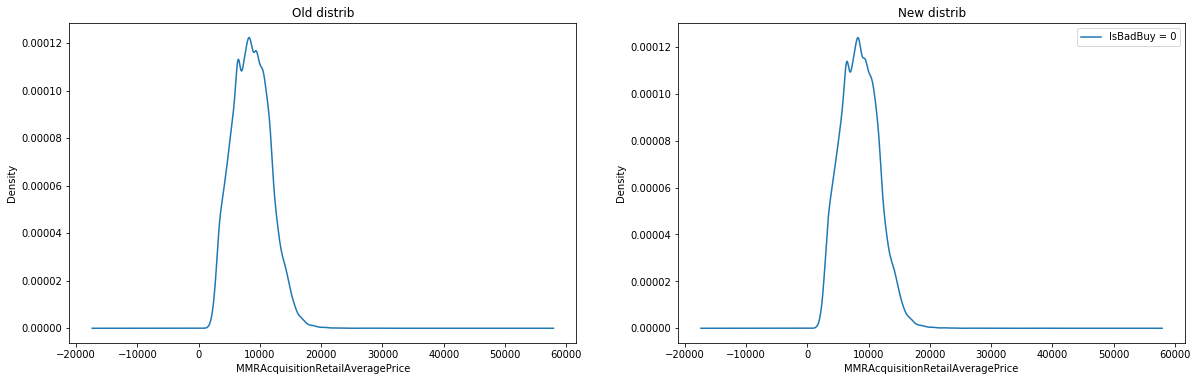

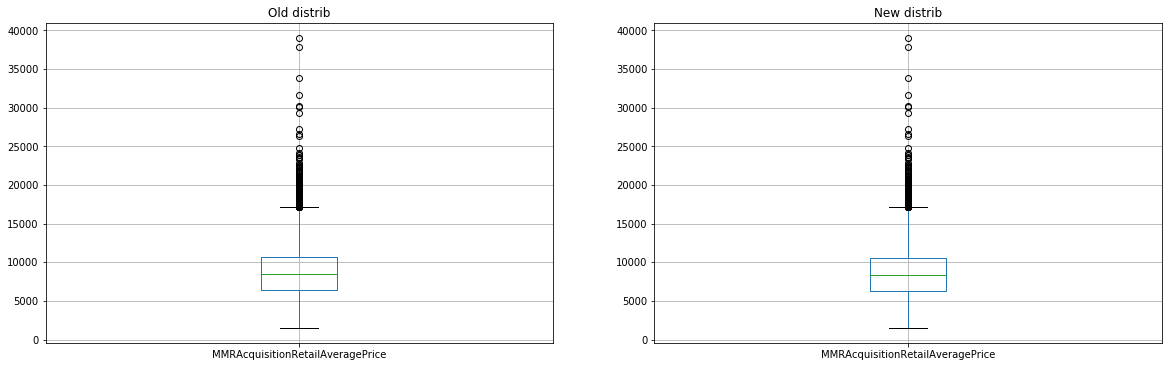






MMRAcquisitonRetailCleanPrice
FullRangeHist


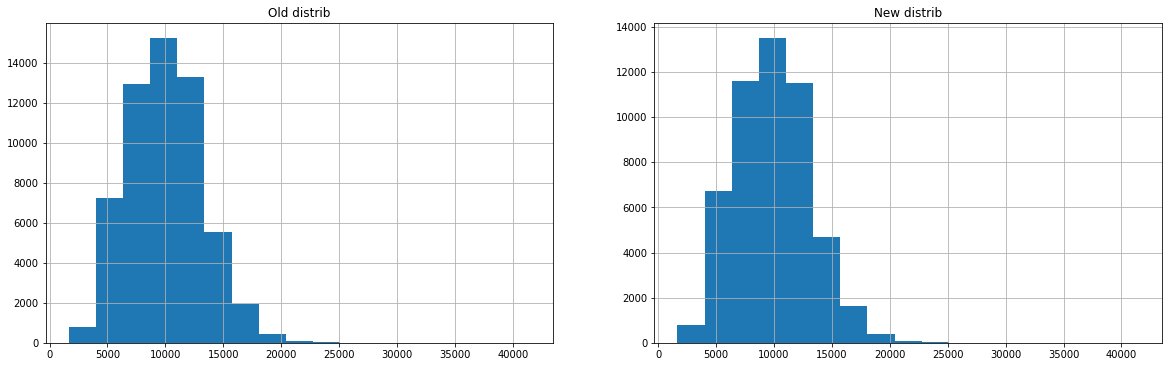

LimSupHist


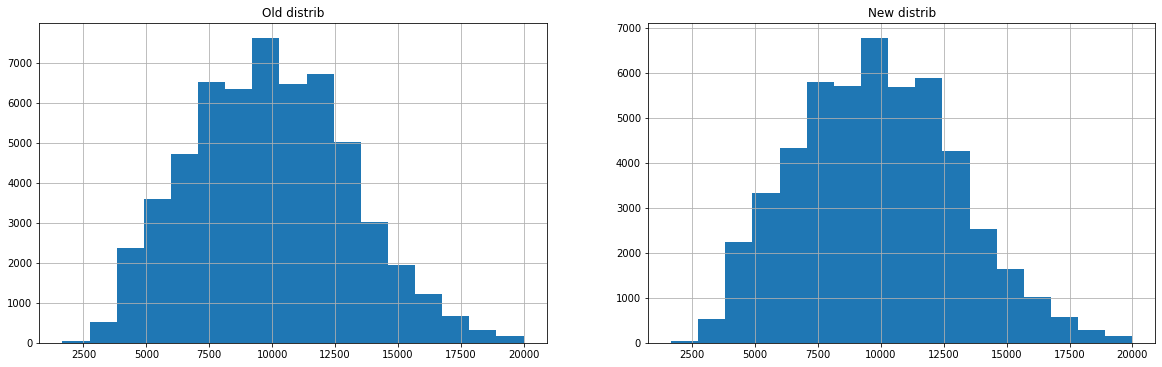

LimBotHist


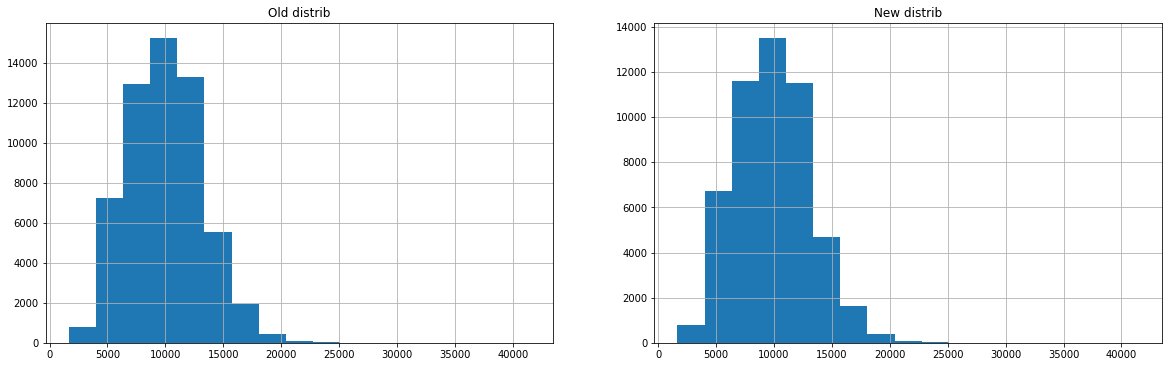

LimBotTopHist


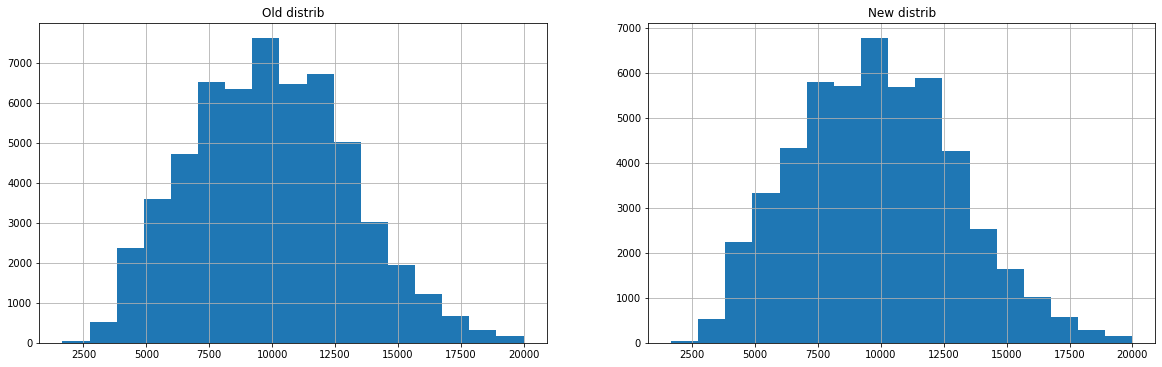

FullRangeDensity


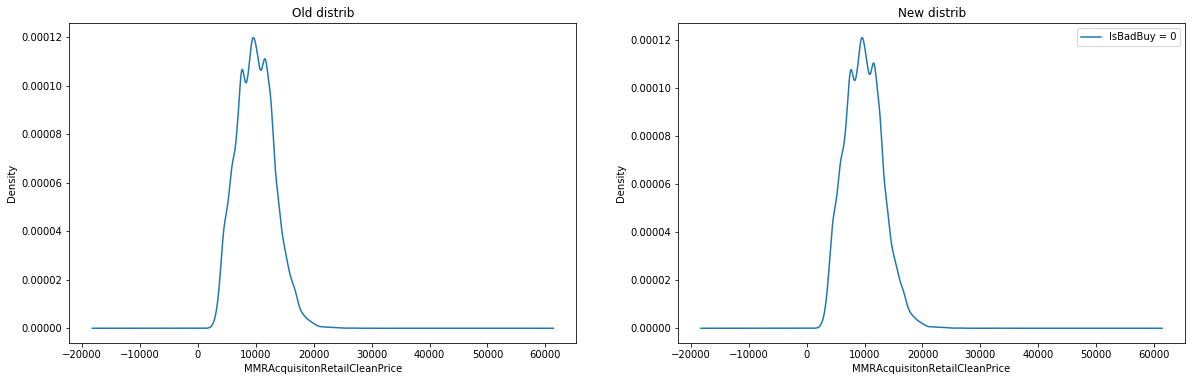

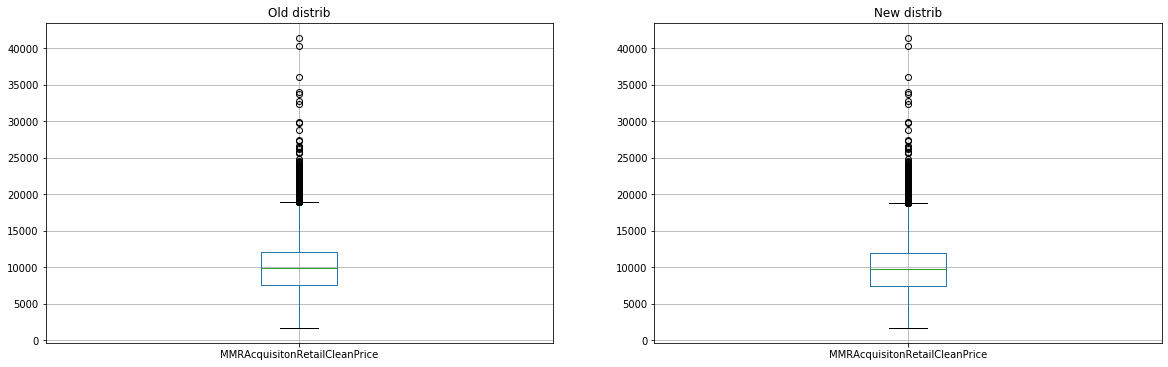






MMRCurrentAuctionAveragePrice
FullRangeHist


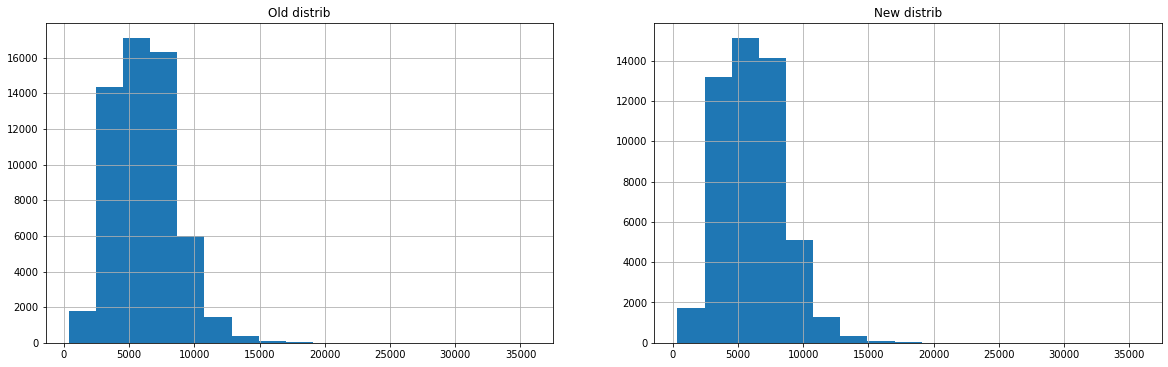

LimSupHist


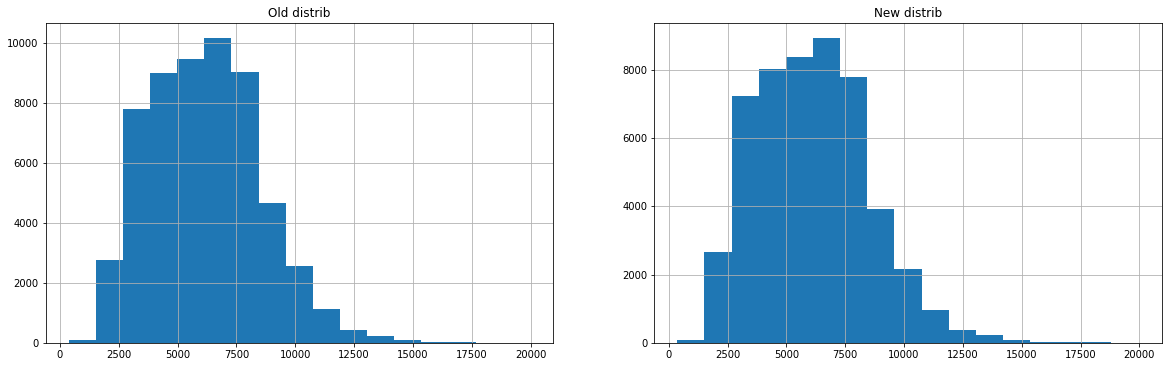

LimBotHist


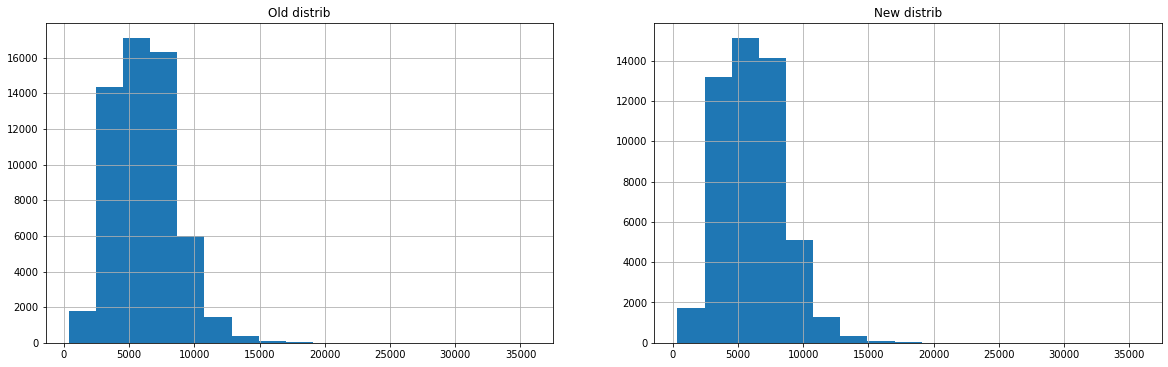

LimBotTopHist


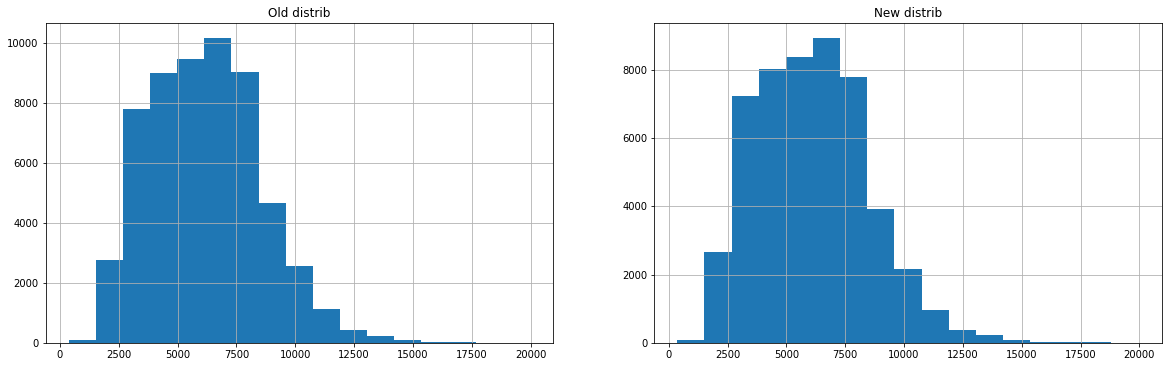

FullRangeDensity


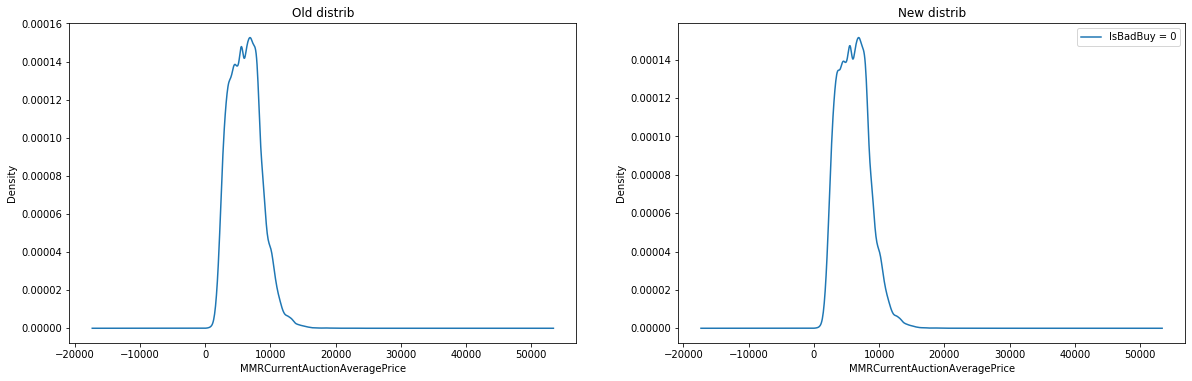

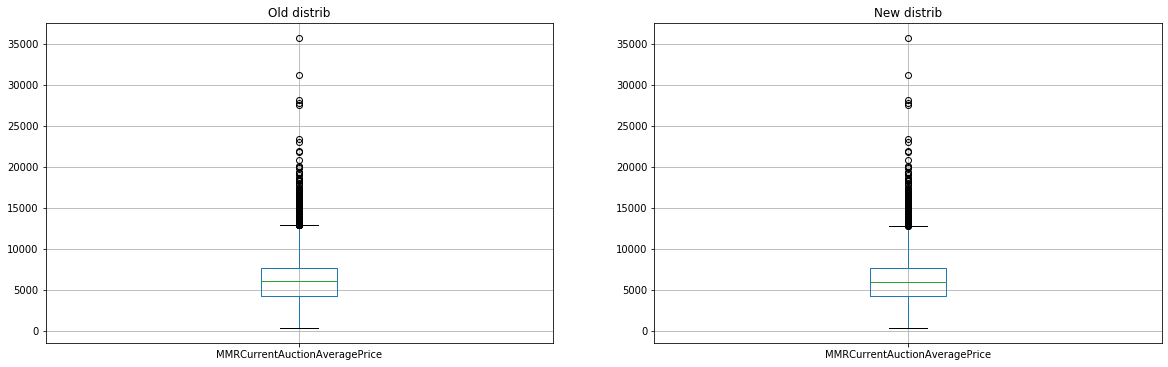






MMRCurrentAuctionCleanPrice
FullRangeHist


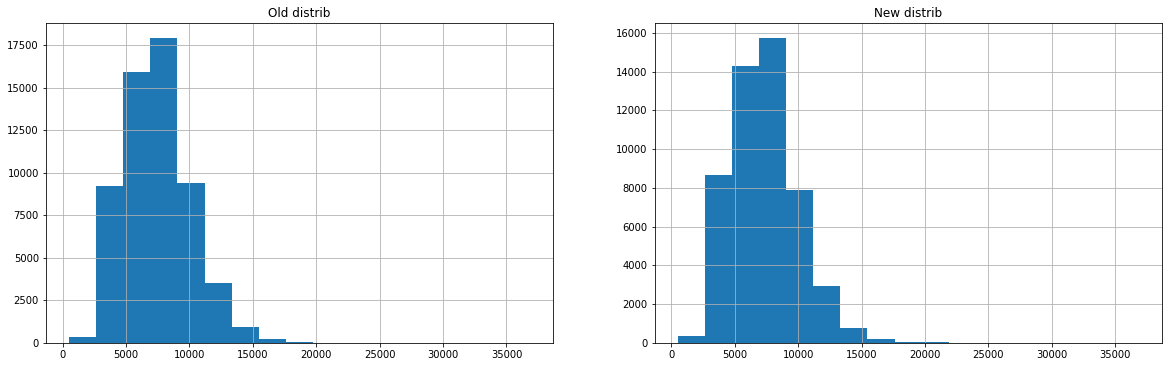

LimSupHist


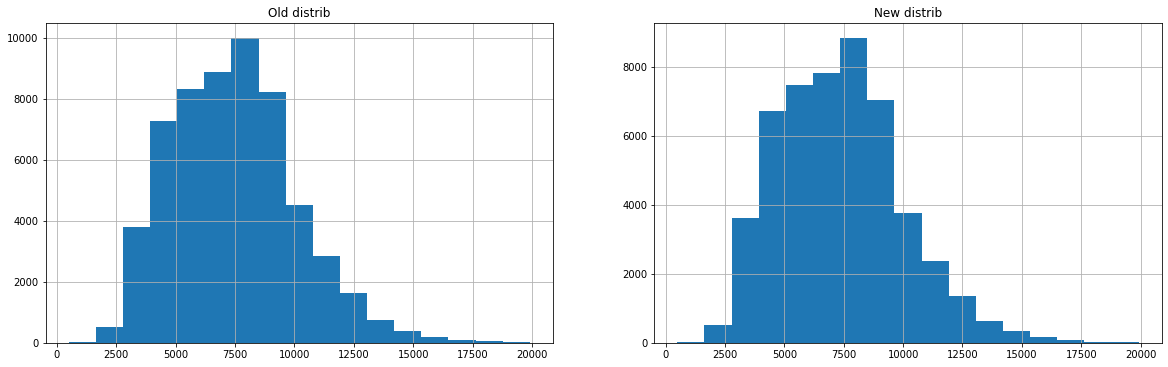

LimBotHist


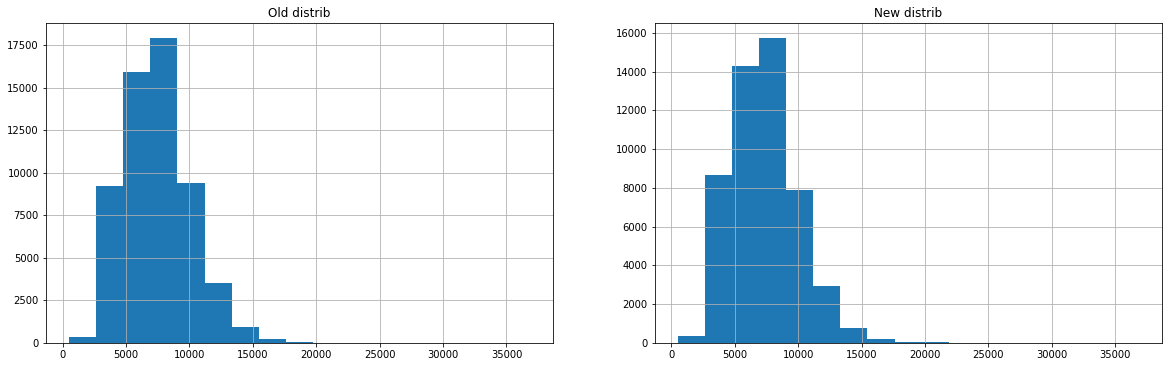

LimBotTopHist


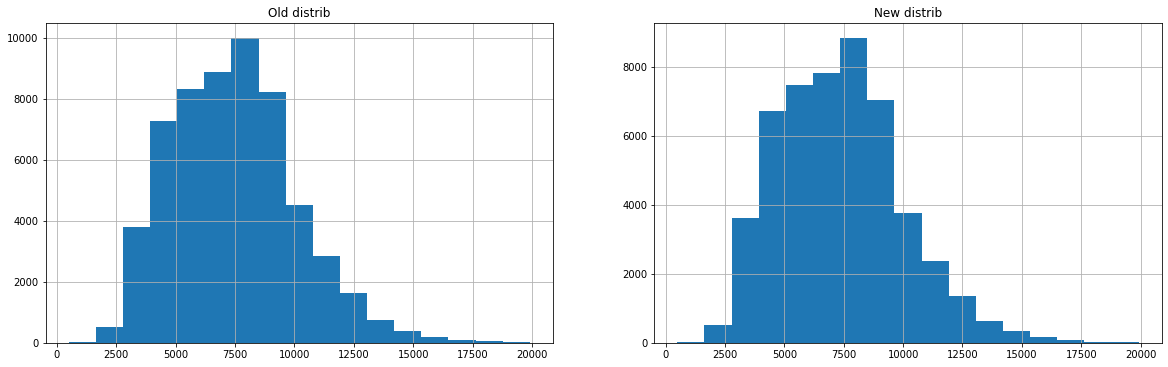

FullRangeDensity


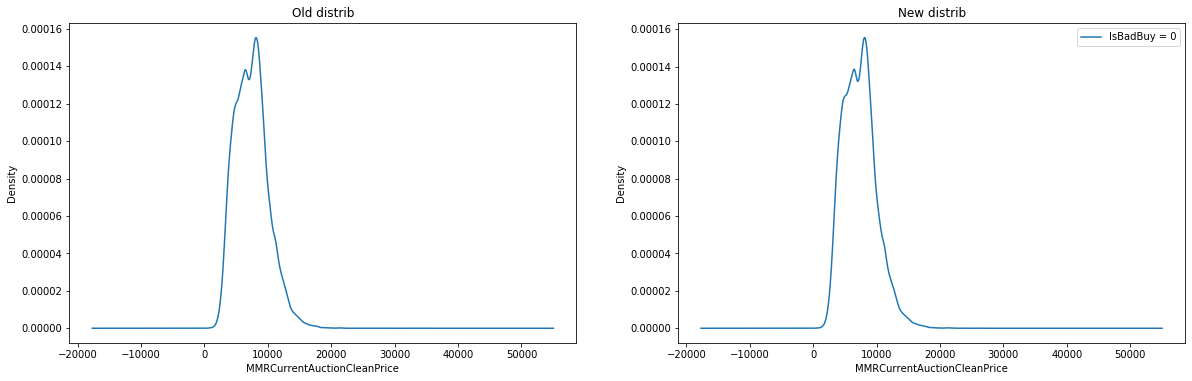

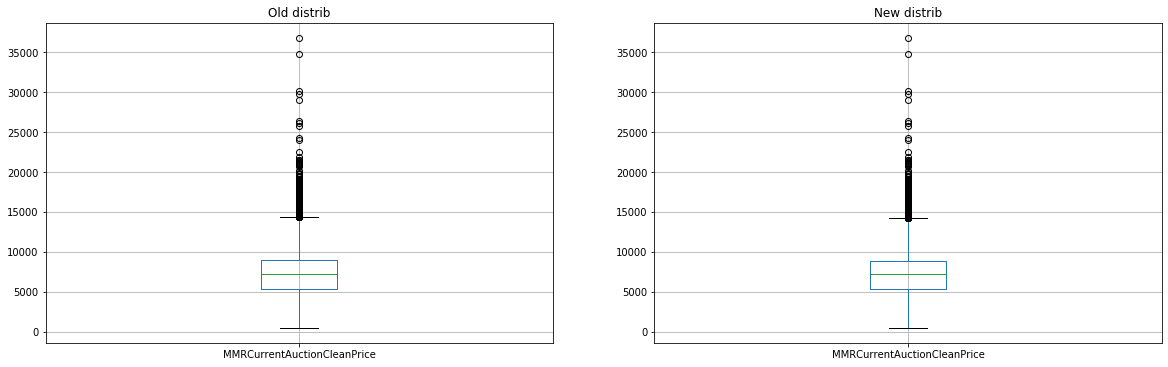






MMRCurrentRetailAveragePrice
FullRangeHist


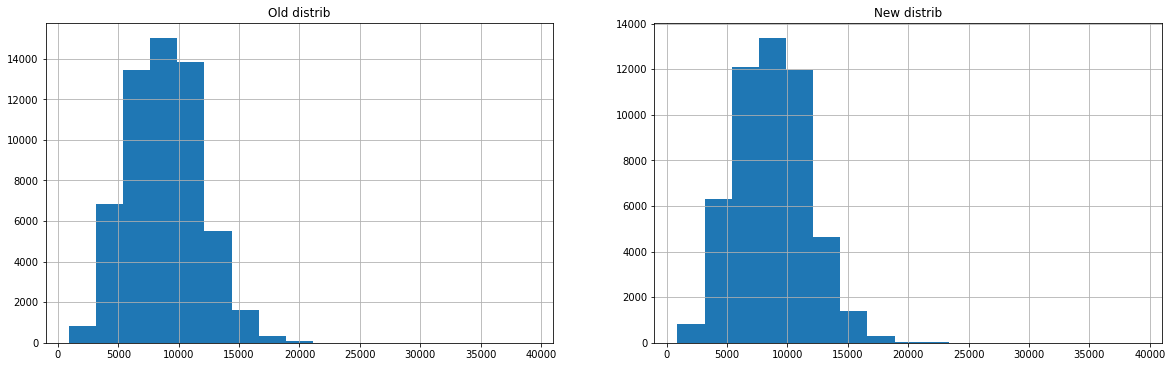

LimSupHist


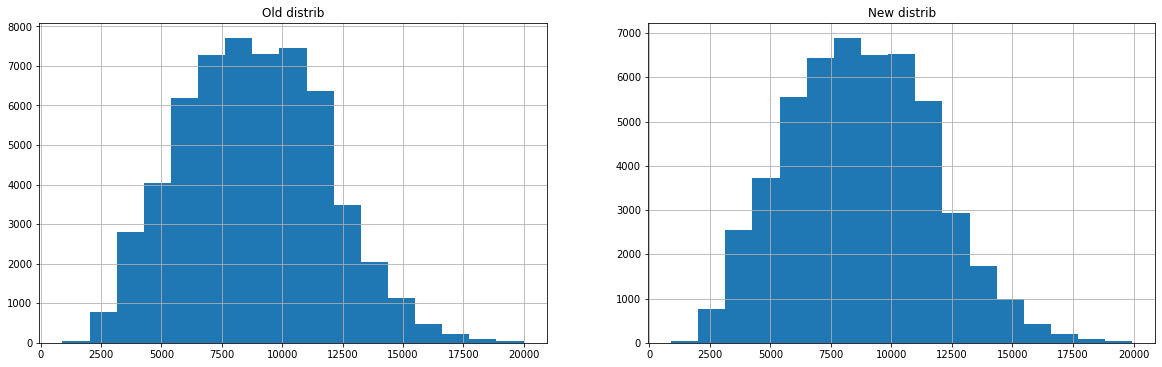

LimBotHist


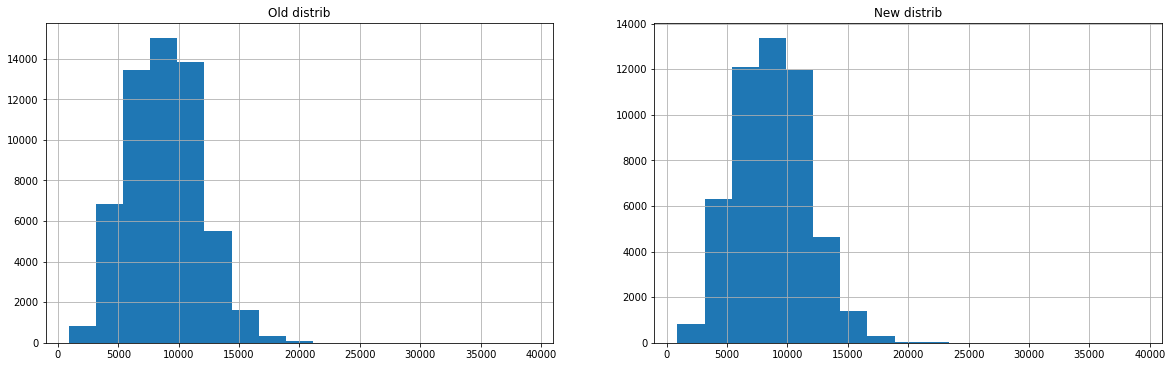

LimBotTopHist


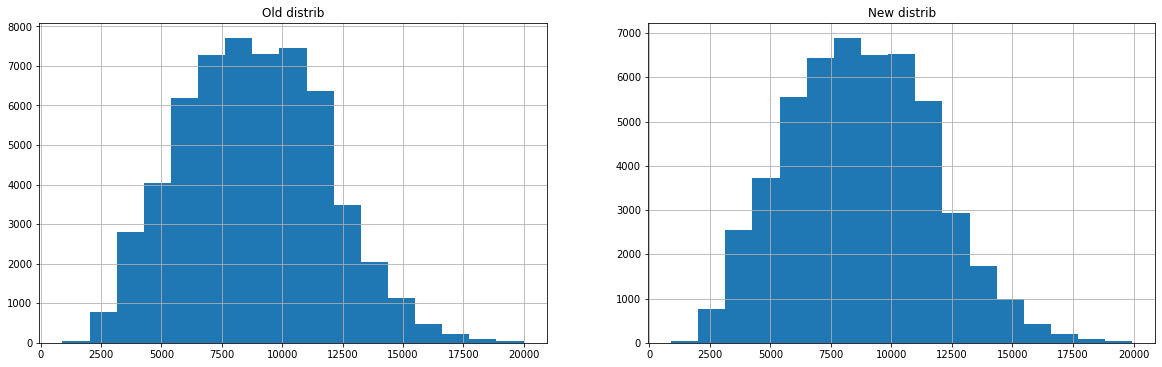

FullRangeDensity


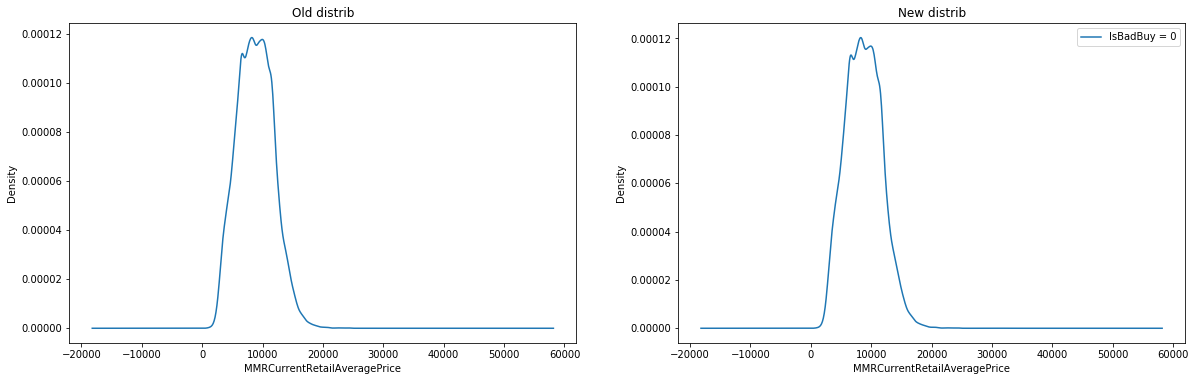

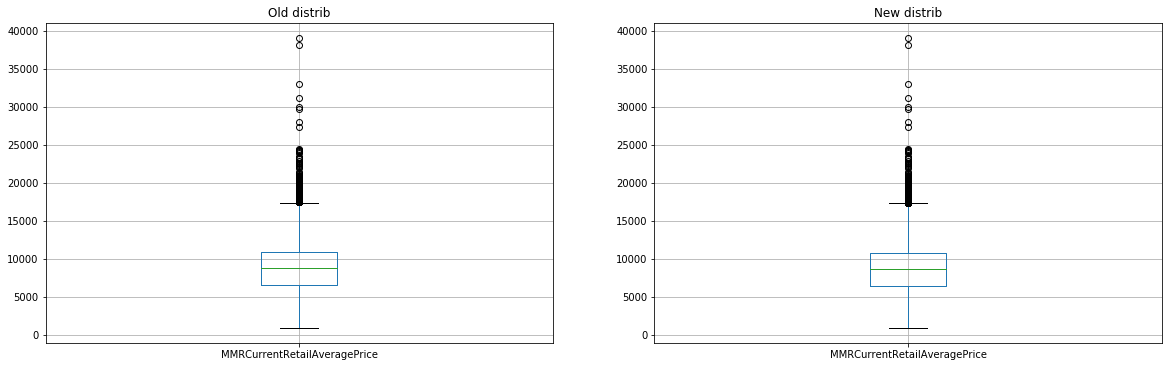






MMRCurrentRetailCleanPrice
FullRangeHist


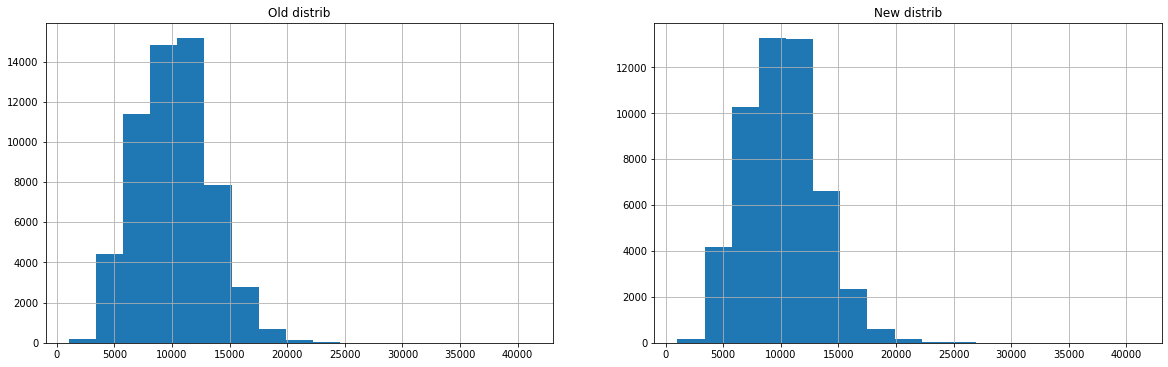

LimSupHist


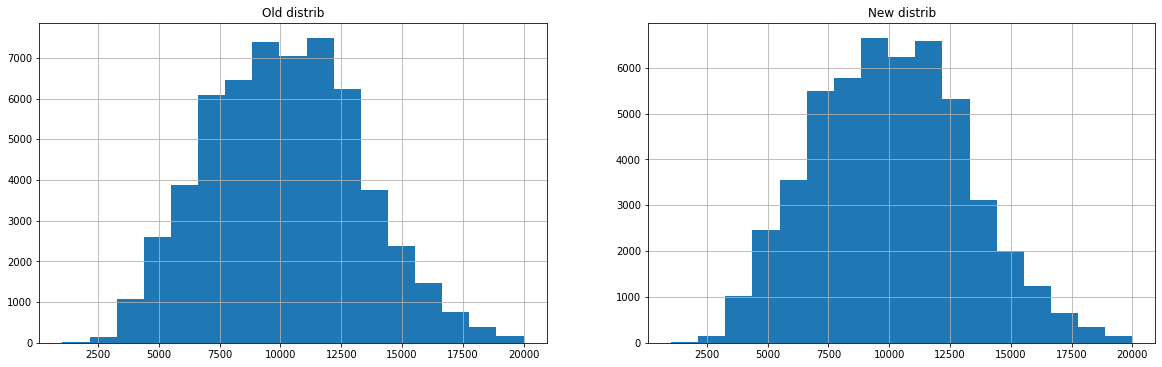

LimBotHist


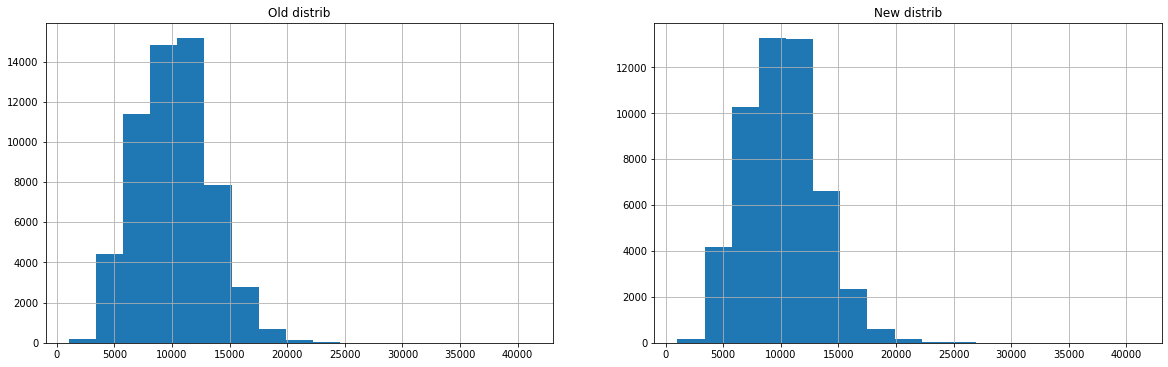

LimBotTopHist


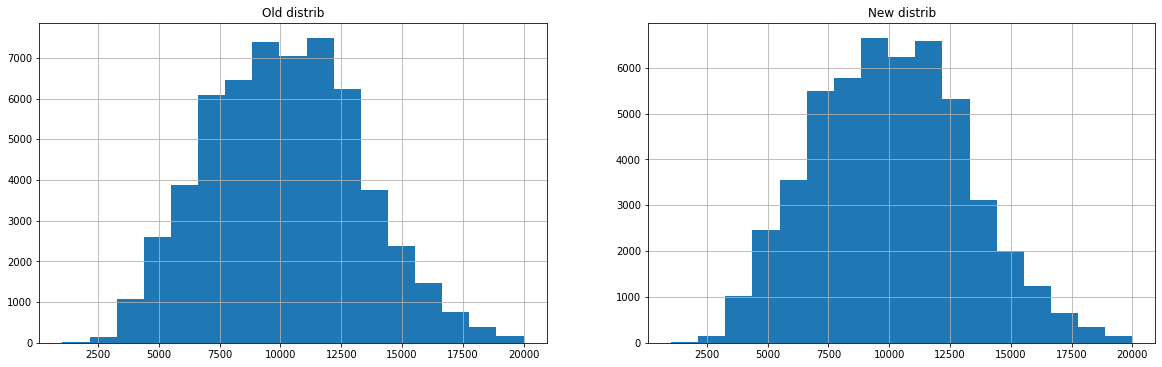

FullRangeDensity


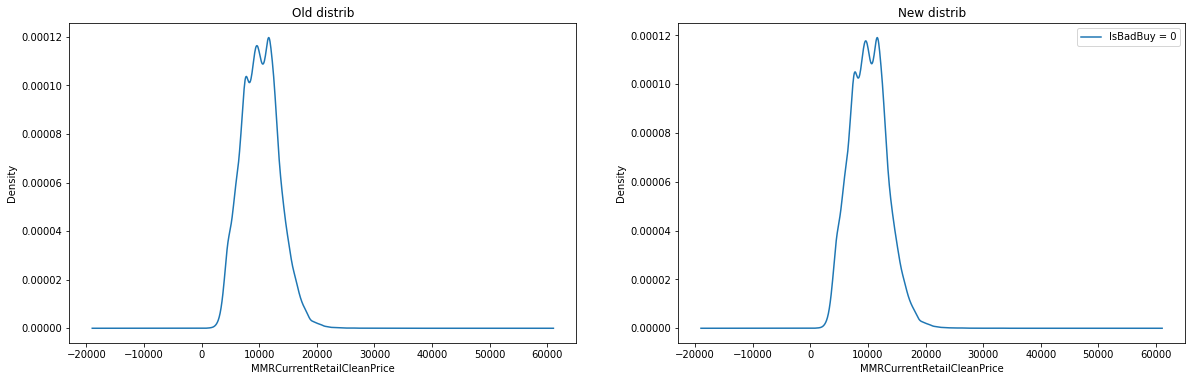

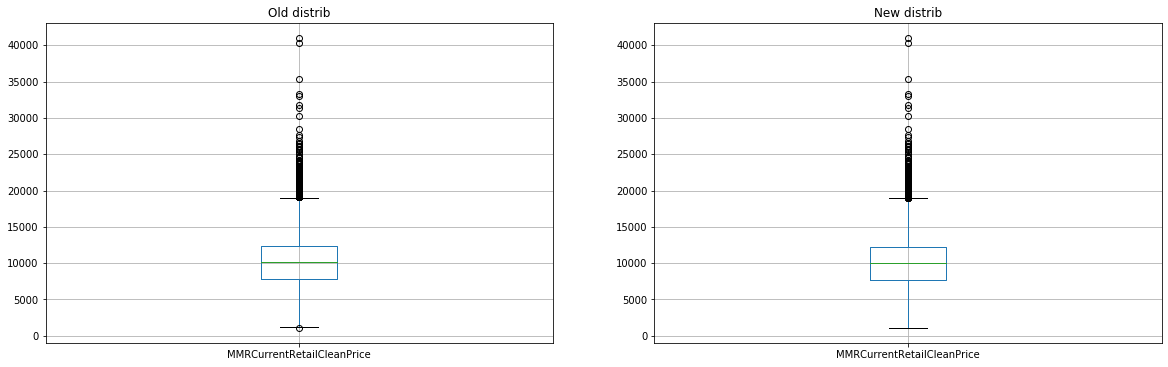






VehBCost
FullRangeHist


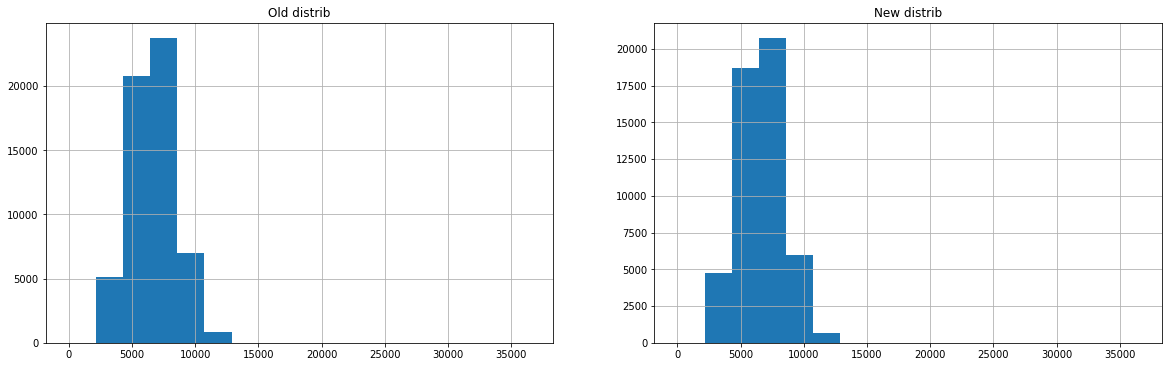

LimSupHist


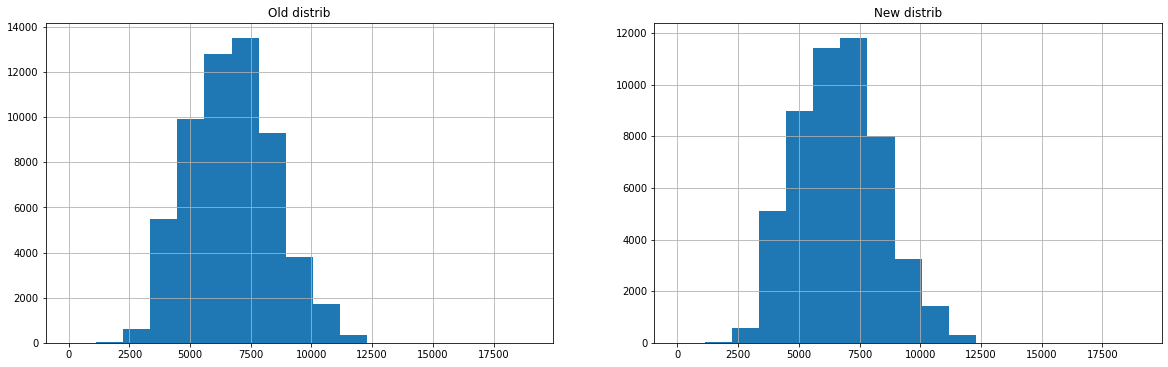

LimBotHist


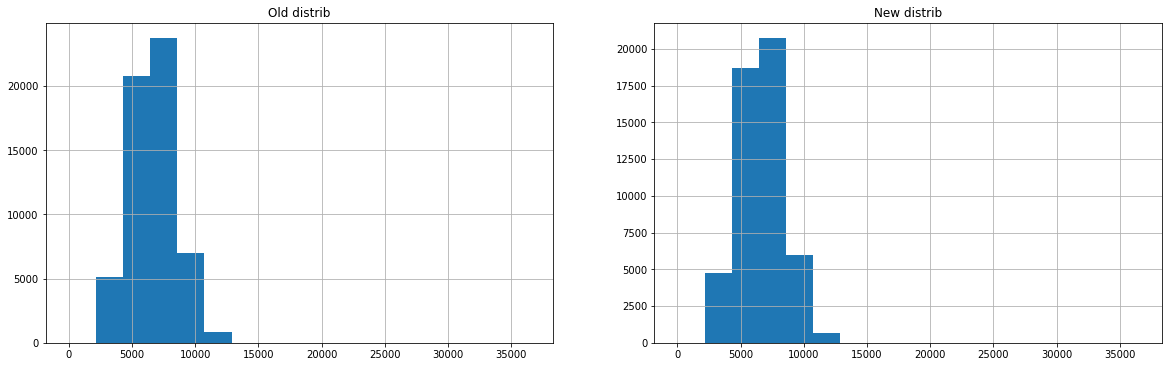

LimBotTopHist


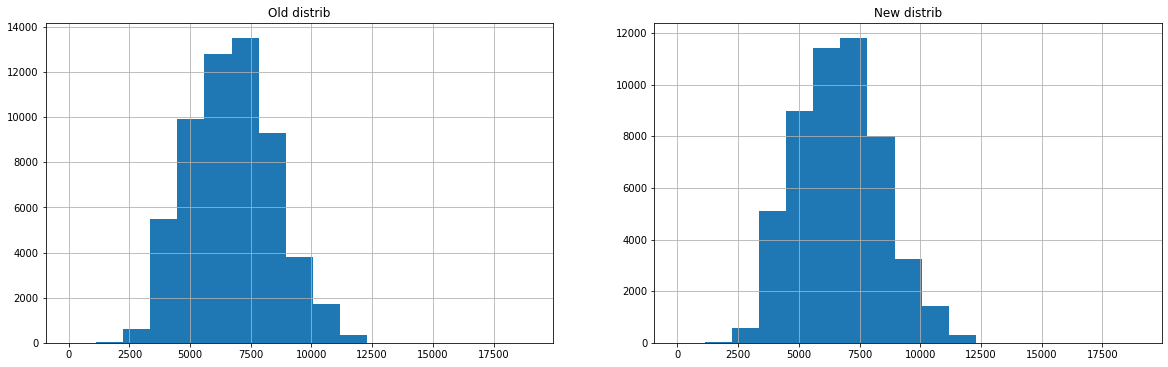

FullRangeDensity


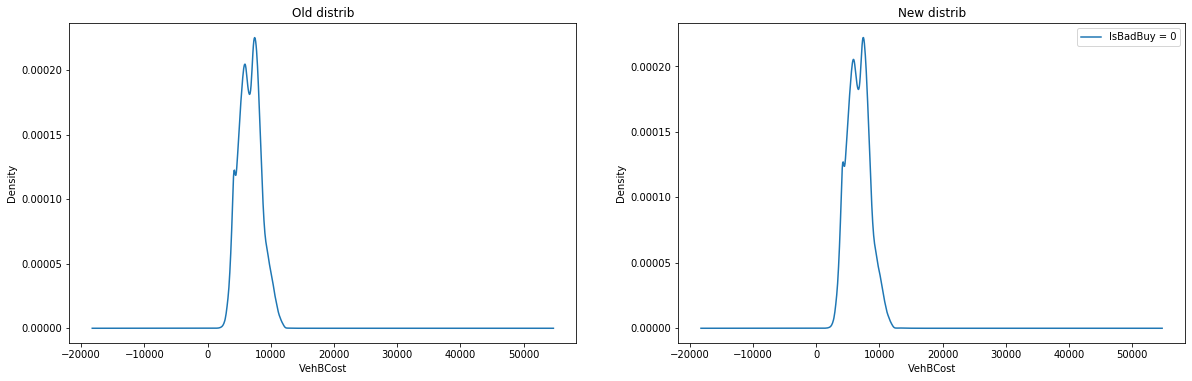

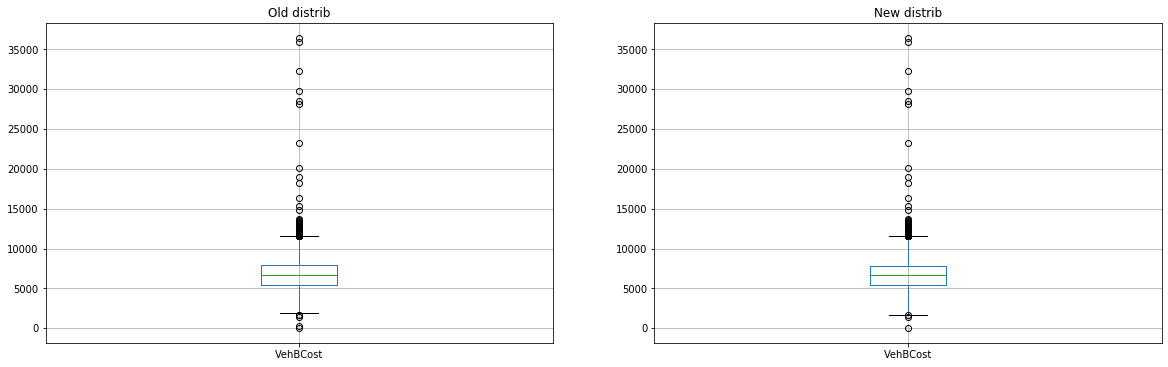






WarrantyCost
FullRangeHist


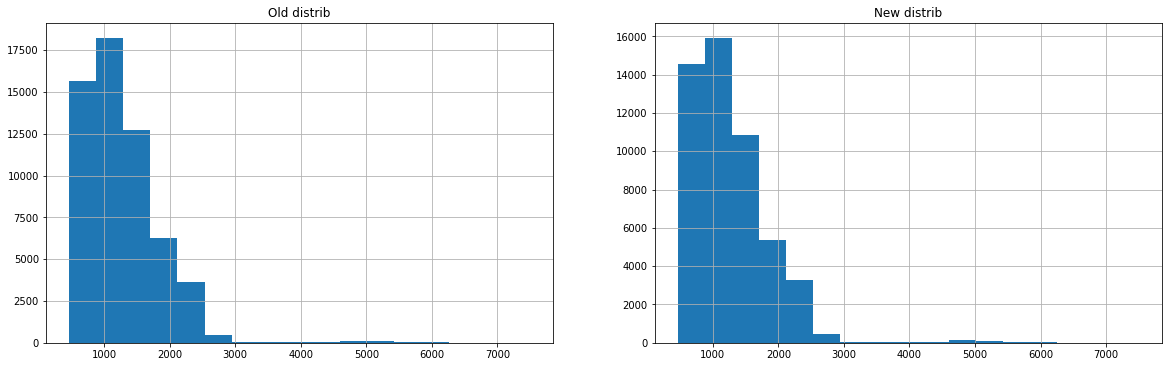

LimSupHist


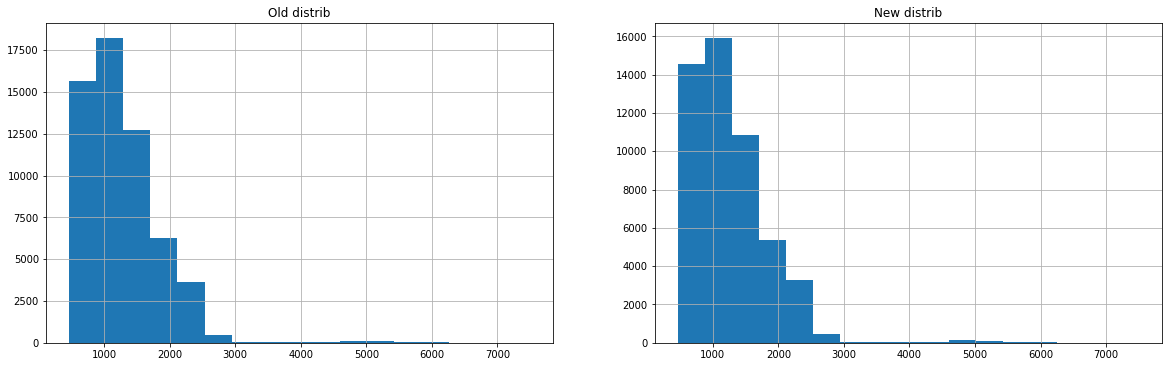

LimBotHist


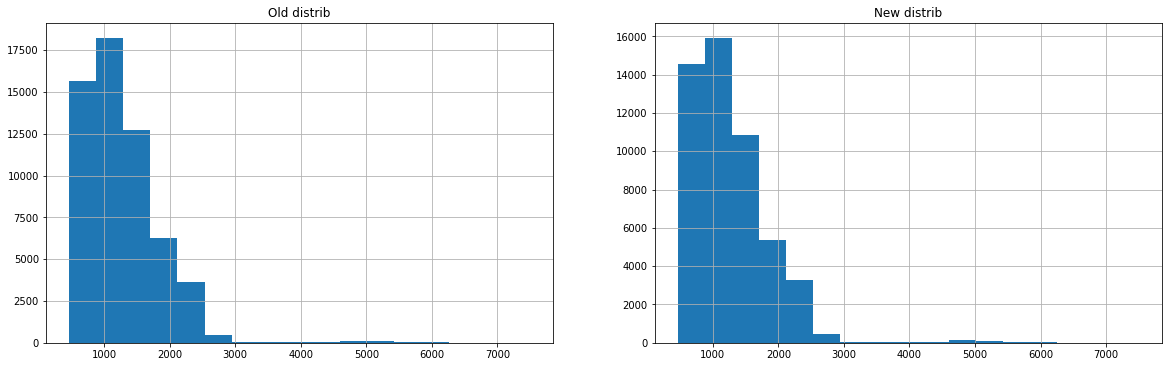

LimBotTopHist


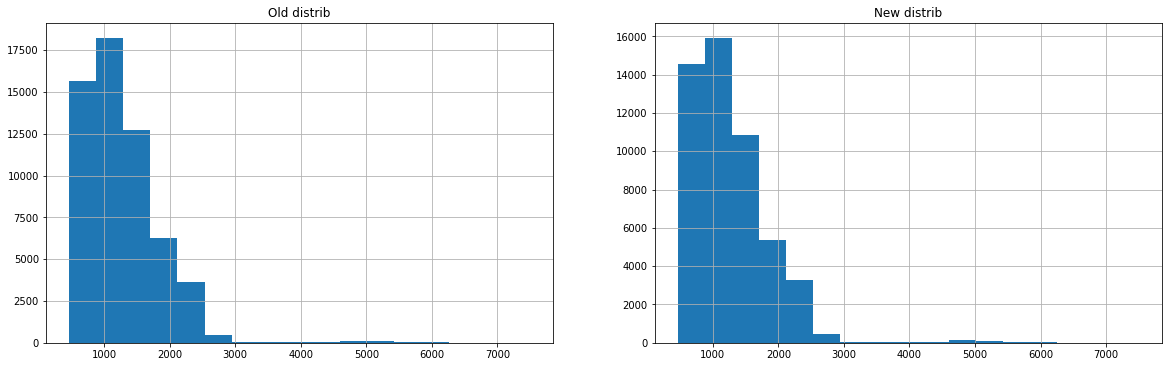

FullRangeDensity


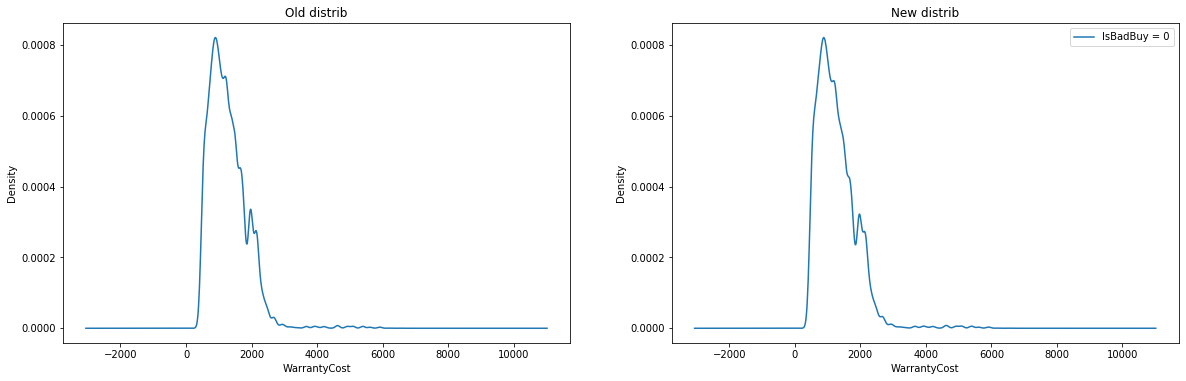

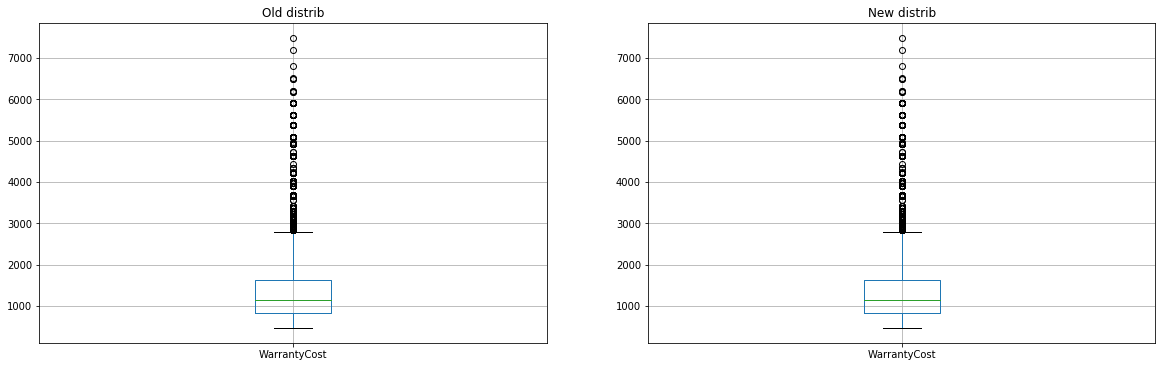

In [67]:
for Variable, limsup, limbot in num_catDis:
    if Variable in pre.columns:
        
        compare= comp and Variable in post.columns
        print(Variable)
        
        print('FullRangeHist')
        #PlotFullHist
        # Set up a grid of plots
        fig = plt.figure(figsize=(20, 20)) 
        fig_dims = (3, 2)

        # Plot old Distribution
        plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
        pre[Variable].hist(bins=PreBins)

        # Plot new Distribution
        if compare:
            plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
            post[Variable].hist(bins=PostBins)

        plt.show()
        
        
        print('LimSupHist')
        #PlotPartialHistTOP
        # Set up a grid of plots
        fig = plt.figure(figsize=(20, 20)) 
        fig_dims = (3, 2)

        datasetSizePre = pre[pre[Variable]<limsup][Variable].count()
        binsSpecificPre = math.ceil(math.log(datasetSizePre,2))+1

        # Plot old Distribution
        plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
        pre[pre[Variable]<limsup][Variable].hist(bins=binsSpecificPre)

        # Plot new Distribution
        if compare:
            datasetSizePost = post[post[Variable]<limsup][Variable].count()
            binsSpecificPost = math.ceil(math.log(datasetSizePost,2))+1
            plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
            post[post[Variable]<limsup][Variable].hist(bins=binsSpecificPost)

        plt.show()    
        
        
        print('LimBotHist')
        #PlotPartialHist
        # Set up a grid of plots
        fig = plt.figure(figsize=(20, 20)) 
        fig_dims = (3, 2)

        datasetSizePre = pre[pre[Variable]>limbot][Variable].count()
        binsSpecificPre = math.ceil(math.log(datasetSizePre,2))+1

        # Plot old Distribution
        plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
        pre[pre[Variable]>limbot][Variable].hist(bins=binsSpecificPre)

        # Plot new Distribution
        if compare:
            datasetSizePost = post[post[Variable]>limbot][Variable].count()
            binsSpecificPost = math.ceil(math.log(datasetSizePost,2))+1
            plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
            post[post[Variable]>limbot][Variable].hist(bins=binsSpecificPost)

        plt.show()  
        
        
        print('LimBotTopHist')
        #PlotPartialHist
        # Set up a grid of plots
        fig = plt.figure(figsize=(20, 20)) 
        fig_dims = (3, 2)

        datasetSizePre = pre[pre[Variable]<limsup][Variable]
        datasetSizePre = datasetSizePre[datasetSizePre>limbot].count()
        binsSpecificPre = math.ceil(math.log(datasetSizePre,2))+1

        # Plot old Distribution
        plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
        dftmp=pre[pre[Variable]<limsup][Variable]
        dftmp[dftmp>limbot].hist(bins=binsSpecificPre)

        # Plot new Distribution
        if compare:
            datasetSizePost = post[post[Variable]<limsup][Variable]
            datasetSizePost = datasetSizePost[datasetSizePost>limbot].count()
            binsSpecificPost = math.ceil(math.log(datasetSizePost,2))+1
            plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
            dftmp2=post[post[Variable]<limsup][Variable]
            dftmp2[dftmp2>limbot].hist(bins=binsSpecificPre)

        plt.show()
        
        print('FullRangeDensity')
        #PlotFullHistDensity
        # Set up a grid of plots
        fig = plt.figure(figsize=(20, 20)) 
        fig_dims = (3, 2)

        # Plot old Distribution
        ax1=plt.subplot2grid(fig_dims, (0, 0), title='Old distrib', xlabel=Variable)
        pre[Variable].plot(kind='kde')
    

        # Plot new Distribution
        if compare:
            ax2=plt.subplot2grid(fig_dims, (0, 1), title='New distrib', xlabel=Variable)
            post[Variable].plot(kind='kde')

        plt.legend(('IsBadBuy = 0', 'IsBadBuy = 1'), loc='best')
    
        plt.show()
        
        
        #BoxPlots
        # Set up a grid of plots
        fig = plt.figure(figsize=(20, 20)) 
        fig_dims = (3, 2)

        # Plot old Distribution
        ax1=plt.subplot2grid(fig_dims, (0, 0), title='Old distrib')
        pre.boxplot(column=[Variable], ax=ax1)
        
        if compare:
            # Plot new Distribution
            ax2=plt.subplot2grid(fig_dims, (0, 1), title='New distrib')
            post.boxplot(column=[Variable], ax=ax2)

        plt.show()
        
        print('\n\n\n\n')